#### Automobile Insurance Claim Prediction - Fraudulant or not

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from utils_machine_learning import *

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
# load the dataset
def load_dataset() -> pd.DataFrame:
    """
    Load the dataset from the CSV file and return it as a pandas DataFrame.

    Args:
        None

    Returns:
        pd.DataFrame: The dataset loaded from the CSV file.
    """

    data_path = 'https://github.com/donadviser/datasets/raw/master/data-don/auto_insurance_claim_fraud.csv'
    data = pd.read_csv(data_path, sep=",")
    return data

In [3]:
data_raw = load_dataset()
data_raw.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25/01/2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21/01/2015             Vehicle Theft                ?      Minor Damage   
2    22/02/2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10/01/2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17/02/2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

### Quick EDA

In [4]:
data_raw=(data_raw
#.shape # The shape of the Dataframe
.pipe(rename_columns_to_snake_case)
# .info() # structure and data types
# .duplicated().sum()  # Check for duplicate rows
# .isnull().sum()  # Check for missing values in each column
# .isnull().sum().sum() # Check the total number of missing values
# .y.value_counts() # Counts the unique values of the target column
# .columns  # List column names
# .value_counts(dropna=False)  # Count unique values in each column, including NaN
# .nunique()  # Count unique values in each column (excluding NaN)
# .describe(include=['float', 'int']).T # Summary statistics to detect anomalies
# .select_dtypes(include=['object'])  # Explore selected data type(s)
# .sample(10)
# .head()
)

In [5]:
# From the utils_machine_learning library
check_df_with_commentries(data_raw, 5, check_na = True, target_col='fraud_reported')

============= OBSERVATIONS ==============
>> The shape of the dataset is (1000, 39), comprising of 1000 rows and 39 columns
>> The data types have object: 21, int64: 17, float64: 1
>> There are 0 duplicate rows. These duplicate rows have to be deleted
>> There are 91 null values
>> The target column fraud_reported has a value of ['Y' 'N']


In [13]:
data_raw.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
def process_df(df):
  """
  returns information about the DataFrame columns.

  Args:
      df: DataFrame.

  Returns:
      A string describing the DataFrame columns and their data types.
  """
  # Get column names and data types
  columns = df.dtypes.to_dict()

  # Create the desired output string
  output = "columns:\n"
  for col, dtype in columns.items():
    if dtype != 'object':
      output += f"  - {col}: {dtype}\n"
      #output += f"  - {col}\n"

  return output
formated_df_info = process_df(data_raw)
print(formated_df_info)

columns:
  - months_as_customer: int64
  - age: int64
  - policy_number: int64
  - policy_deductable: int64
  - policy_annual_premium: float64
  - umbrella_limit: int64
  - insured_zip: int64
  - capital_gains: int64
  - capital_loss: int64
  - incident_hour_of_the_day: int64
  - number_of_vehicles_involved: int64
  - bodily_injuries: int64
  - witnesses: int64
  - total_claim_amount: int64
  - injury_claim: int64
  - property_claim: int64
  - vehicle_claim: int64
  - auto_year: int64



In [16]:
# separate the columns into different data dtypes
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(data_raw)

Observations: 1000
Variables: 39
Categorical Columns: 21 -> ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'fraud_reported', 'policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']
Numerical Columns: 14 -> ['months_as_customer', 'age', 'policy_number', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital_gains', 'capital_loss', 'incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
Cardinal Columns: 4 -> ['policy_bind_date', 'incident_date', 'incident_location', 'auto_model']
Nominal Columns: 4 -> ['policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']


In [25]:
categorical_data_type = [col for col in categorical_cols if col not in nominal_cols+cardinal_cols]
numerical_data_type = numerical_cols+nominal_cols

In [26]:
for item in categorical_data_type:
    print(f"Unique values for categorical column: {item}")
    print(f"{data_raw[item].unique()}")
    #print(f'Min - Max values for categorical column: {item}')
    #print(f"{data_raw[item].min()} - {data_raw[item].max()}")
    print('----------------------------------------\n')

Unique values for categorical column: policy_state
['OH' 'IN' 'IL']
----------------------------------------

Unique values for categorical column: policy_csl
['250/500' '100/300' '500/1000']
----------------------------------------

Unique values for categorical column: insured_sex
['MALE' 'FEMALE']
----------------------------------------

Unique values for categorical column: insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
----------------------------------------

Unique values for categorical column: insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
----------------------------------------

Unique values for categorical column: insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 's

# EDA

In [9]:
drop_cols = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
]

drop_old_cols = [
    "auto_year",
    "incident_hour_of_the_day",   
]

features_created_cols = [
    "vehicle_age",
    "incident_period_of_day"
]
target_col = 'fraud_reported'

In [10]:
yes_no_map = {"Y": 1, "N": 0}

job_mapping = {
    'High School': 1,
    "Bachelor's": 2, 
    "Master's": 3, 
    "Doctorate": 4
    }

bins_hour = [-1, 5, 11, 17, 20, 24]  # Time bins for different periods of the day
names_period = ["early_morning", "morning", "afternoon", "evening", "night"] 

In [11]:
# Define the mapping for yes or no value
current_year = datetime.datetime.now().year  # Get the current year dynamically
data = (data_raw
        .pipe(rename_columns_to_snake_case)
        #.replace('?', np.nan)  # Replace '?' with np.nan
        #.replace({'job': job_mapping, 'education': education_mapping})
        .assign(fraud_reported=data_raw['fraud_reported'].map(yes_no_map),
                vehicle_age=current_year - data_raw['auto_year'],  # Calculate vehicle age
                incident_period_of_day=pd.cut(data_raw['incident_hour_of_the_day'], bins=bins_hour, labels=names_period)  # Create period of day feature
                )
        #.replace({'default': yes_no_map, 'housing': yes_no_map, 'loan': yes_no_map})
        #.assign(new_age_cat=lambda df: pd.cut(df['age'], bins=[-np.inf, 35, 55, np.inf], labels=["young", "middleage", "old"]))
        .drop(columns=drop_cols)
        .drop(columns=drop_old_cols)
        )

In [12]:
data.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital_gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital_loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft                ?      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                   NaN             NY     Arlington   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   
2                            3              NO                2          3   
3                            1               ?                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  fraud_reported  vehicle_age  \
0          52080       Saab        92x               1           20   
1           3510   Mercedes       E400               1           17   
2          23100      Dodge        RAM               0           17   
3          50720  Chevrolet      Tahoe               1           10   
4           4550     Accura        RSX               0           15   

  incident_period_of_day  
0          early_morning  
1                morning  
2                morning  
3          early_morning  
4                evening

In [74]:
# separate the columns into different data dtypes
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(data_raw)


Observations: 1000
Variables: 33
Categorical Columns: 21 -> ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'fraud_reported', 'incident_period_of_day']
Numerical Columns: 11 -> ['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 'capital_gains', 'capital_loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'vehicle_age']
Cardinal Columns: 1 -> ['auto_model']
Nominal Columns: 6 -> ['policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'fraud_reported', 'incident_period_of_day']


              policy_state  Ratio
policy_state                     
OH                     352   35.2
IL                     338   33.8
IN                     310   31.0
##########################################


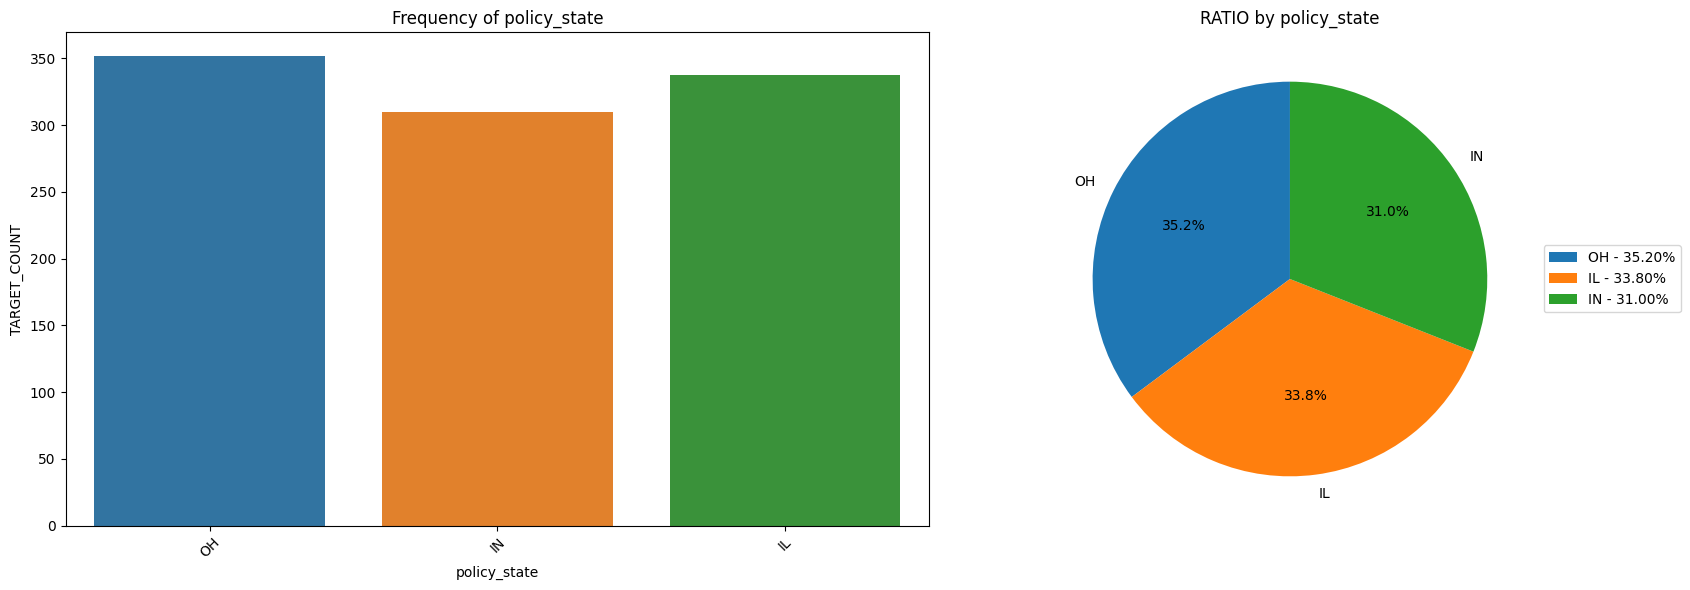

             insured_sex  Ratio
insured_sex                    
FEMALE               537   53.7
MALE                 463   46.3
##########################################


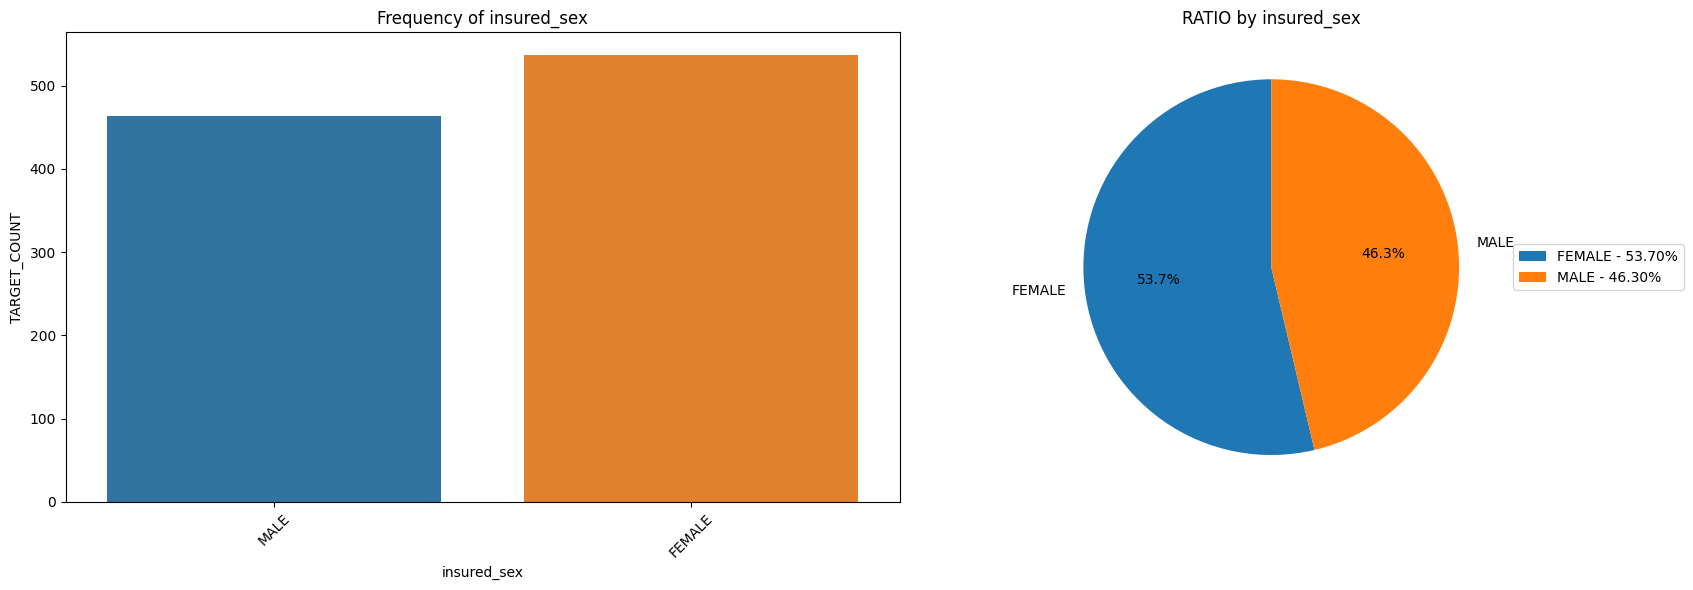

                         insured_education_level  Ratio
insured_education_level                                
JD                                           161   16.1
High School                                  160   16.0
Associate                                    145   14.5
MD                                           144   14.4
Masters                                      143   14.3
PhD                                          125   12.5
College                                      122   12.2
##########################################


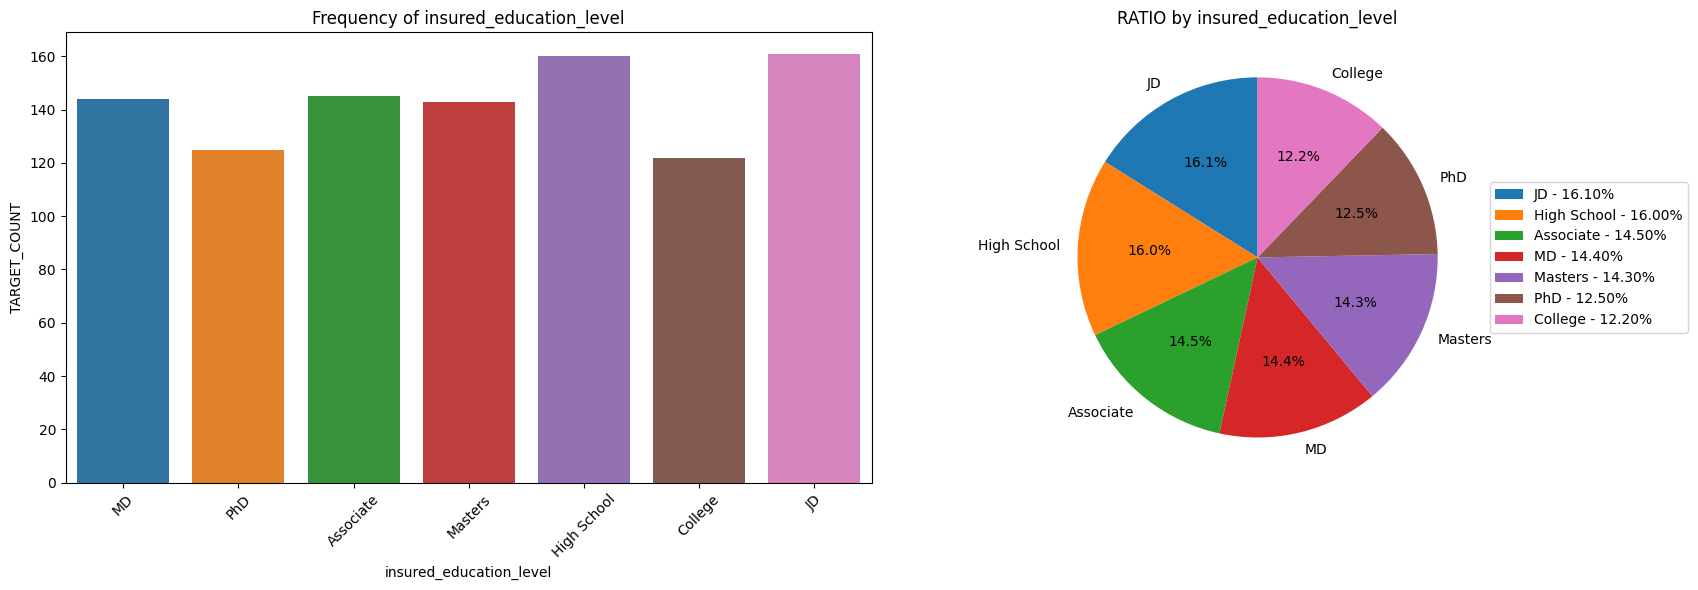

                    insured_occupation  Ratio
insured_occupation                           
machine-op-inspct                   93    9.3
prof-specialty                      85    8.5
tech-support                        78    7.8
sales                               76    7.6
exec-managerial                     76    7.6
craft-repair                        74    7.4
transport-moving                    72    7.2
other-service                       71    7.1
priv-house-serv                     71    7.1
armed-forces                        69    6.9
adm-clerical                        65    6.5
protective-serv                     63    6.3
handlers-cleaners                   54    5.4
farming-fishing                     53    5.3
##########################################


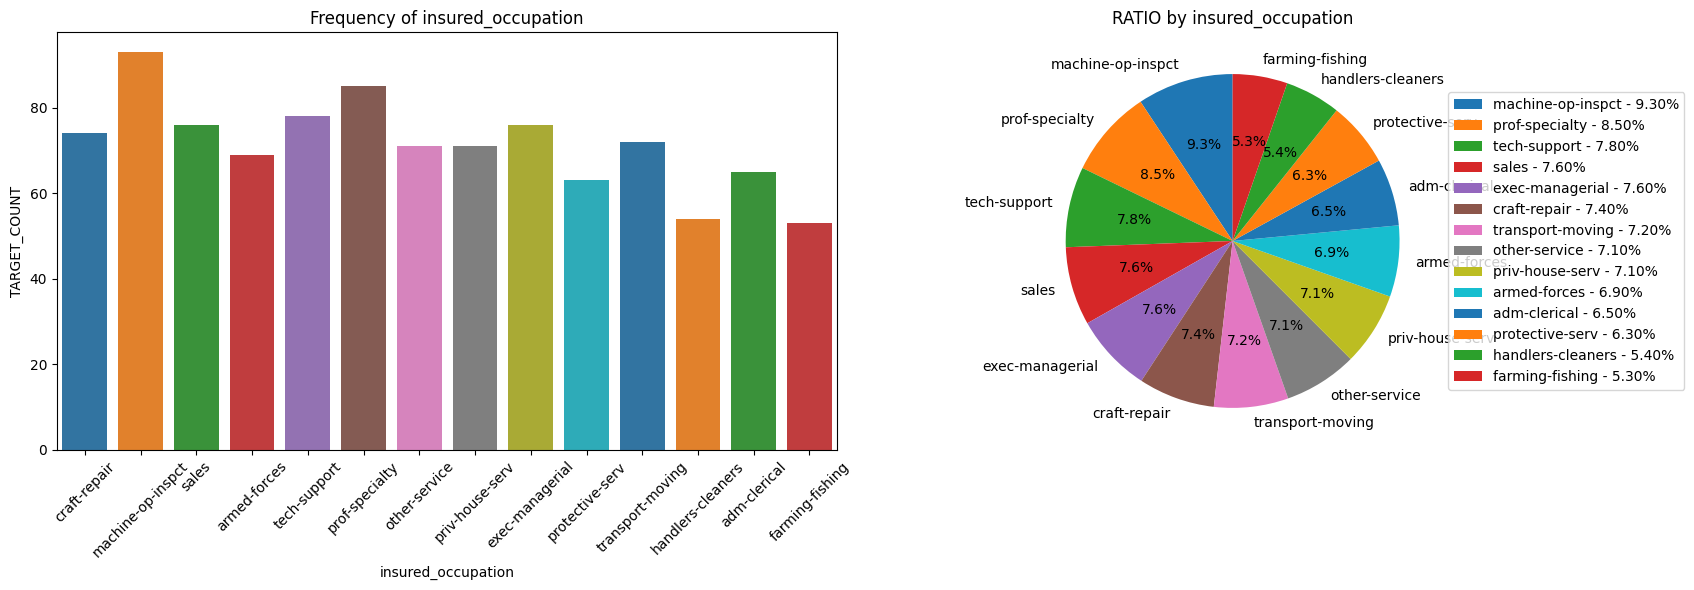

                 insured_hobbies  Ratio
insured_hobbies                        
reading                       64    6.4
exercise                      57    5.7
paintball                     57    5.7
bungie-jumping                56    5.6
movies                        55    5.5
golf                          55    5.5
camping                       55    5.5
kayaking                      54    5.4
yachting                      53    5.3
hiking                        52    5.2
video-games                   50    5.0
skydiving                     49    4.9
base-jumping                  49    4.9
board-games                   48    4.8
polo                          47    4.7
chess                         46    4.6
dancing                       43    4.3
sleeping                      41    4.1
cross-fit                     35    3.5
basketball                    34    3.4
##########################################


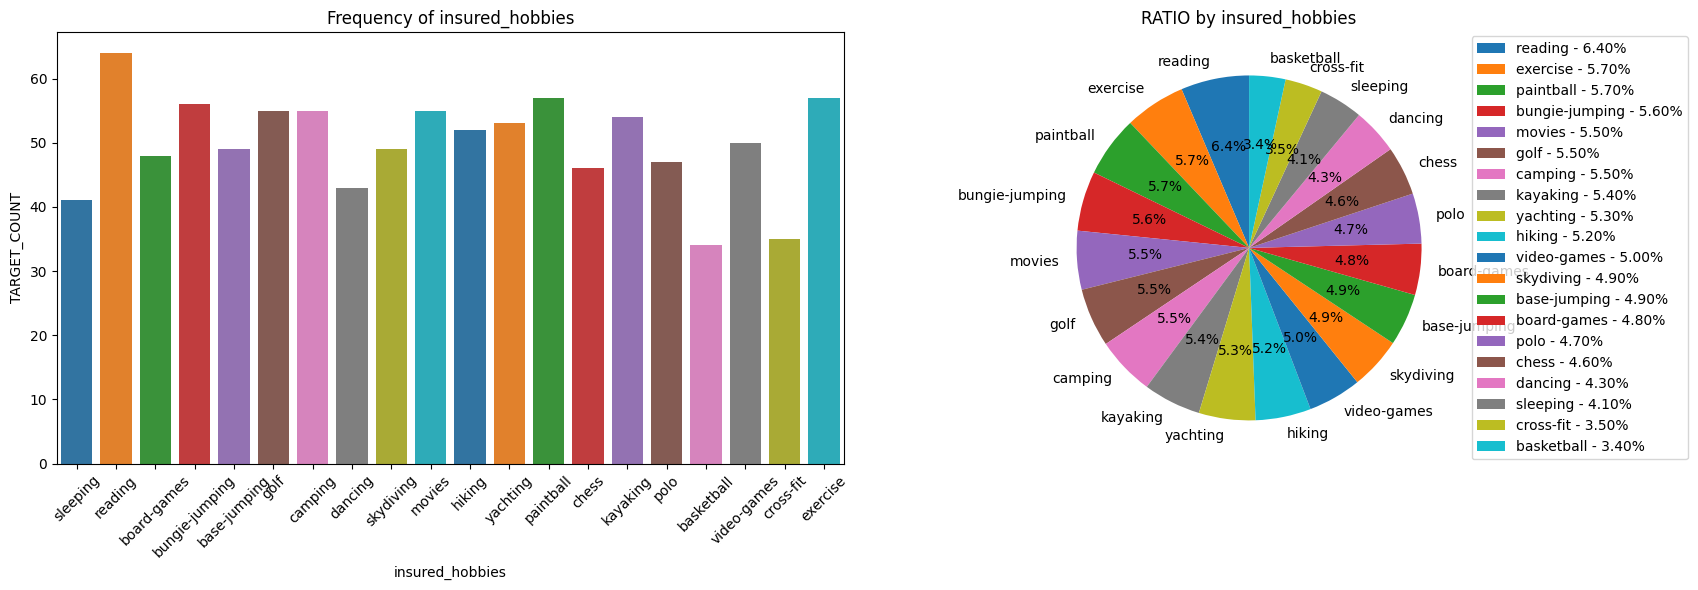

                      insured_relationship  Ratio
insured_relationship                             
own-child                              183   18.3
other-relative                         177   17.7
not-in-family                          174   17.4
husband                                170   17.0
wife                                   155   15.5
unmarried                              141   14.1
##########################################


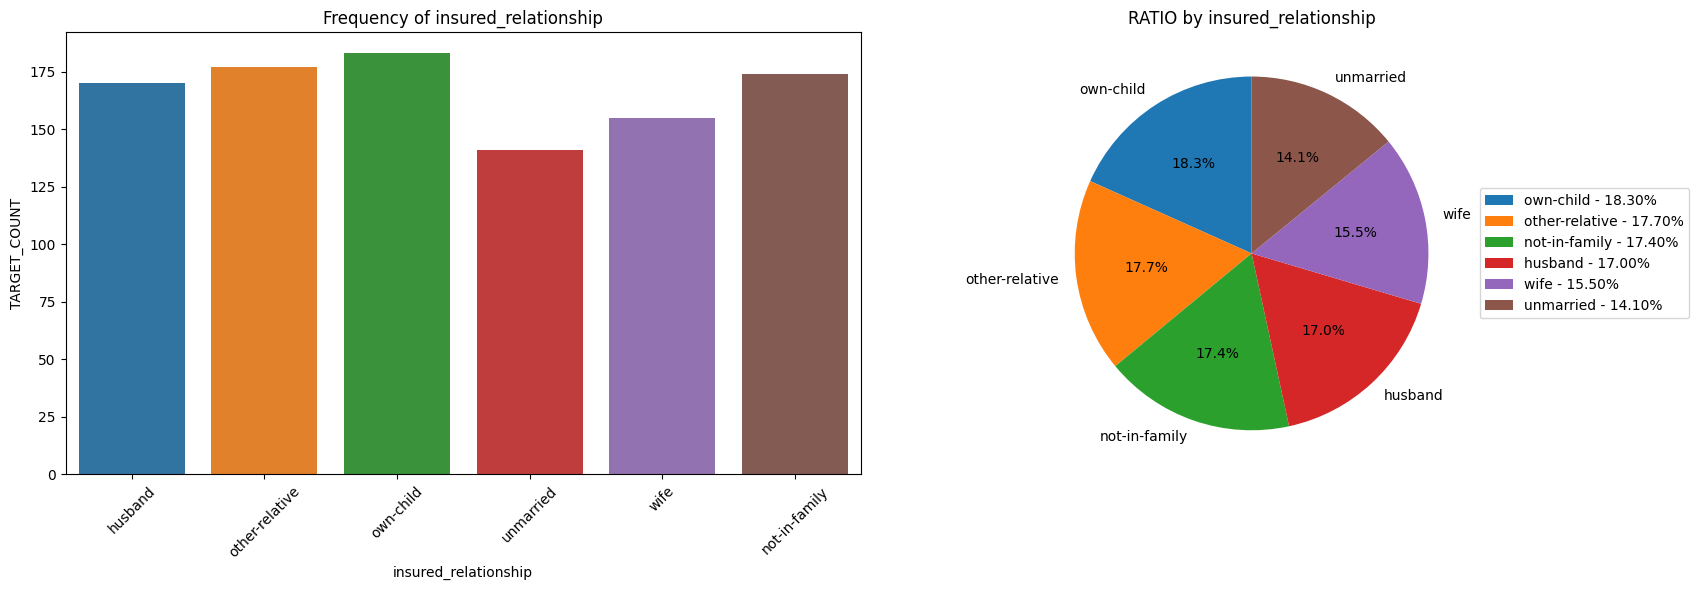

                          incident_type  Ratio
incident_type                                 
Multi-vehicle Collision             419   41.9
Single Vehicle Collision            403   40.3
Vehicle Theft                        94    9.4
Parked Car                           84    8.4
##########################################


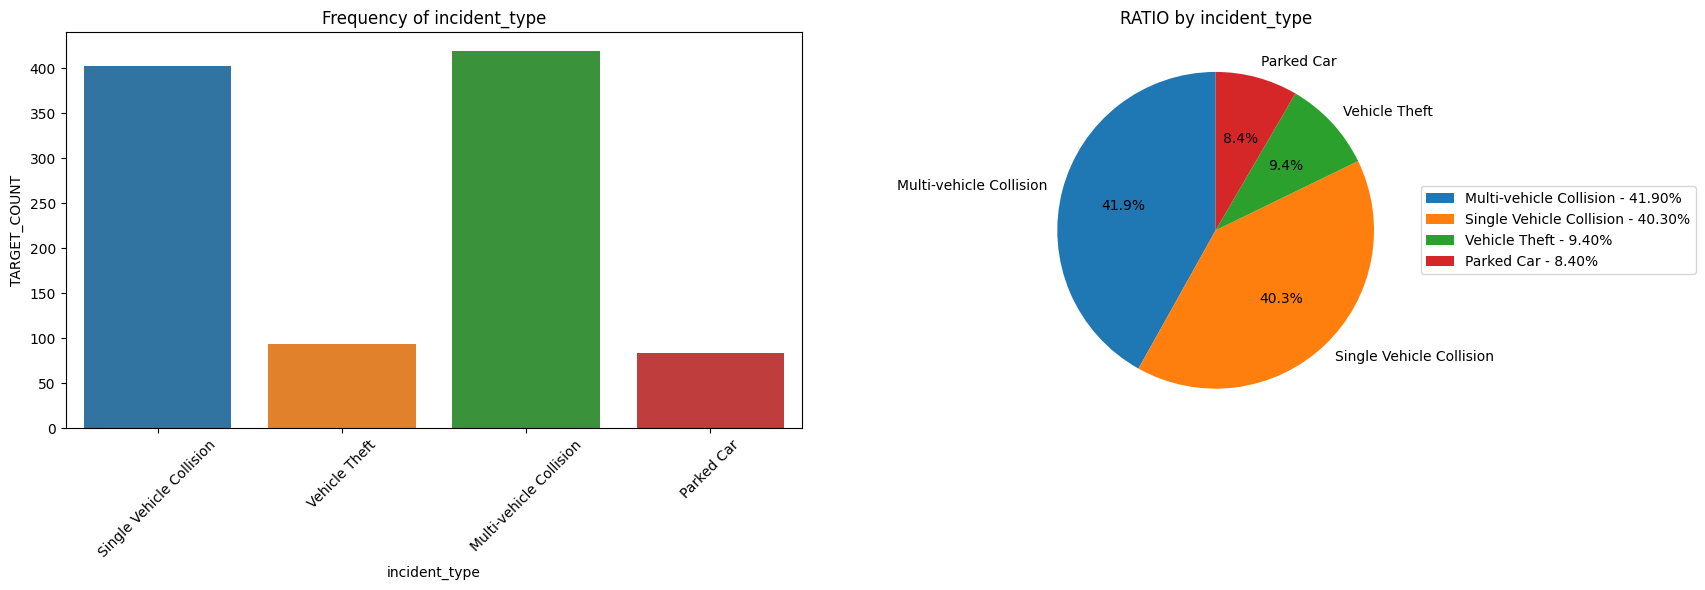

                 collision_type  Ratio
collision_type                        
Rear Collision              292   29.2
Side Collision              276   27.6
Front Collision             254   25.4
unknown                     178   17.8
##########################################


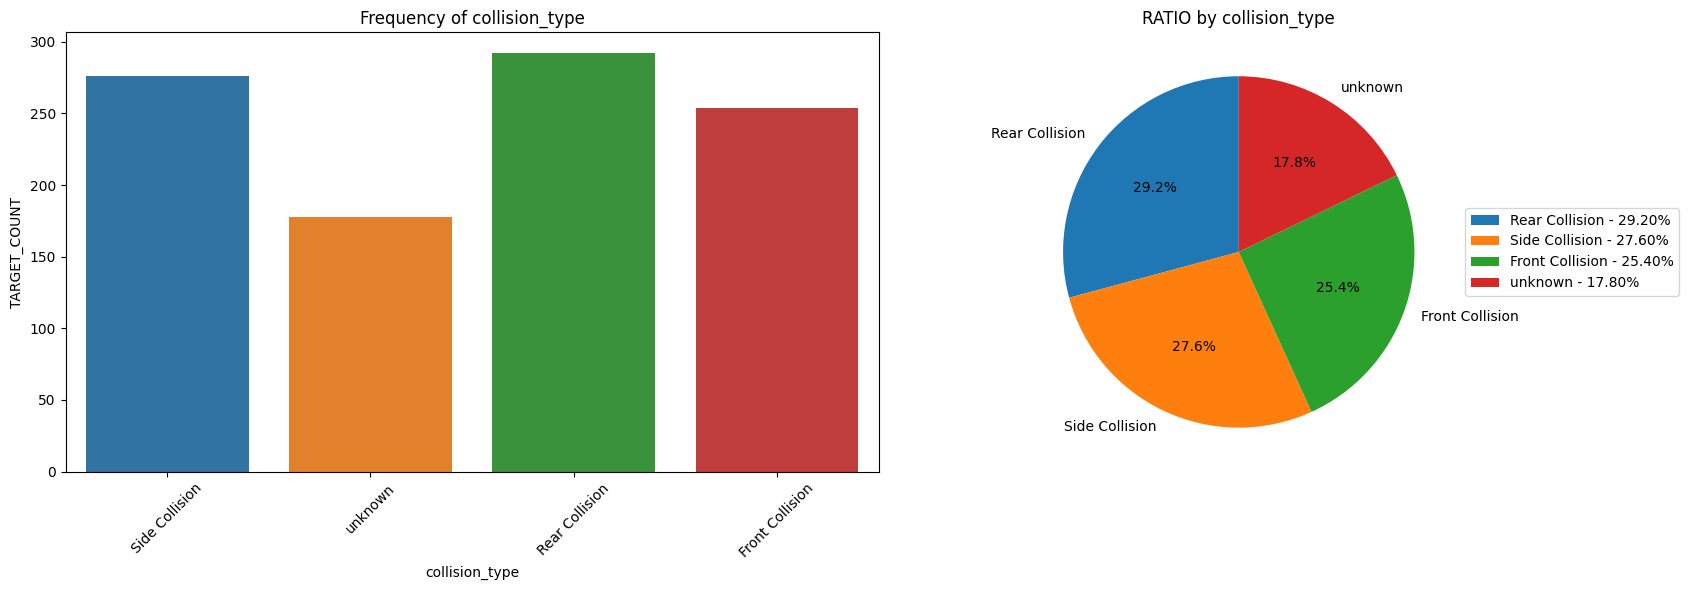

                   incident_severity  Ratio
incident_severity                          
Minor Damage                     354   35.4
Total Loss                       280   28.0
Major Damage                     276   27.6
Trivial Damage                    90    9.0
##########################################


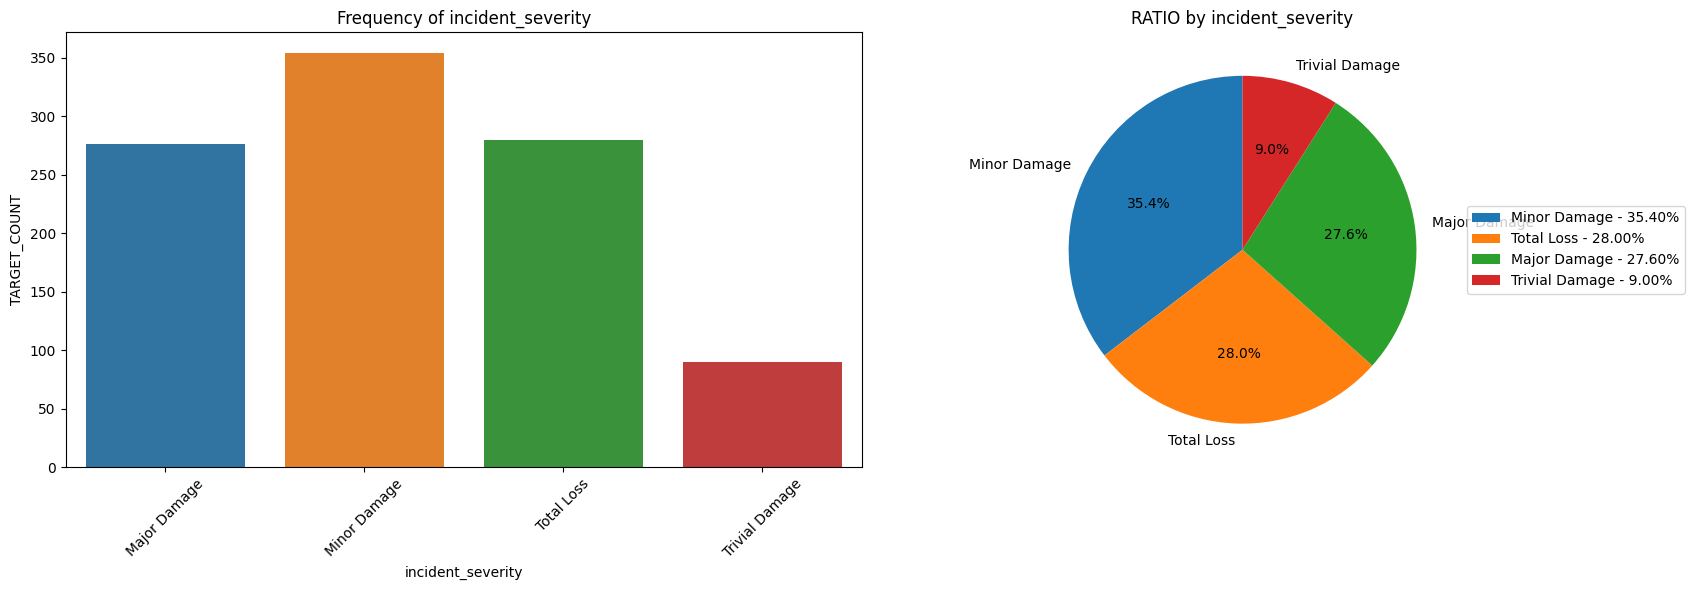

                       authorities_contacted  Ratio
authorities_contacted                              
Police                                   292   29.2
Fire                                     223   22.3
Other                                    198   19.8
Ambulance                                196   19.6
##########################################


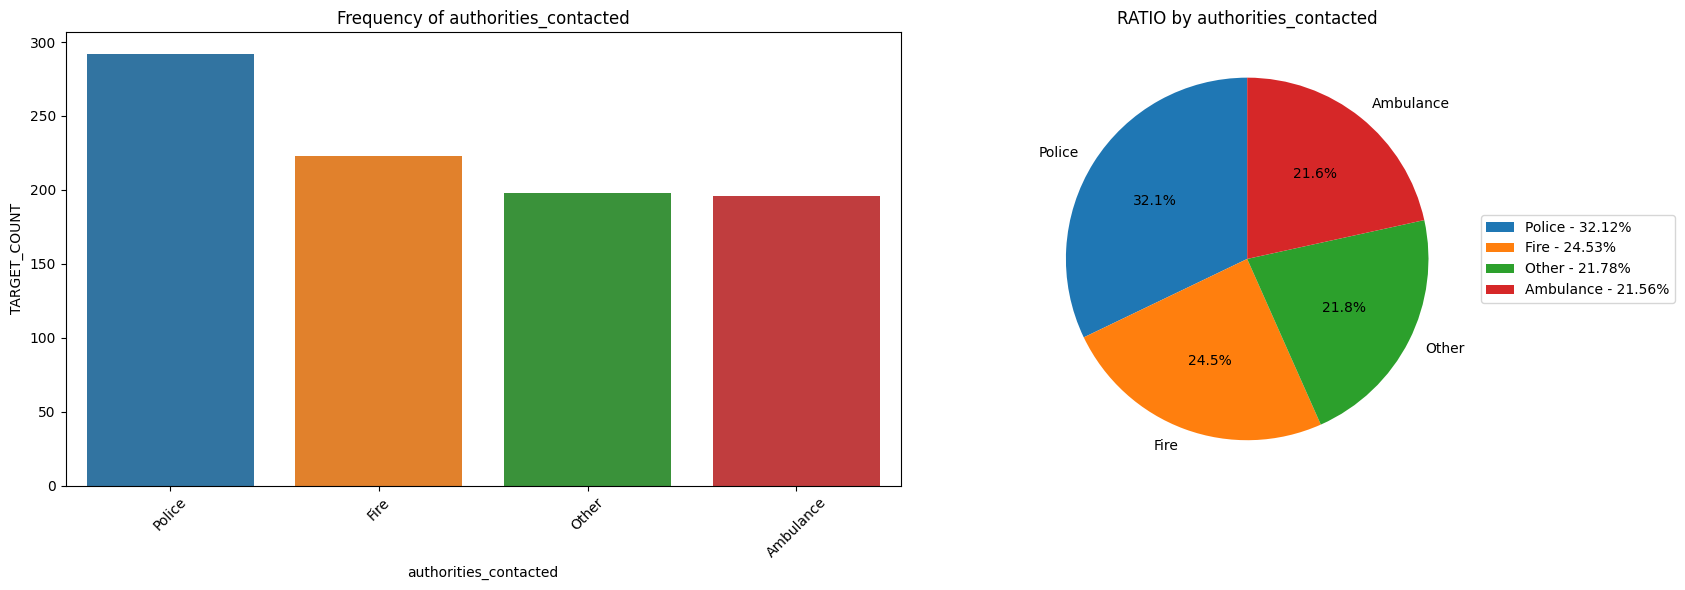

                incident_state  Ratio
incident_state                       
NY                         262   26.2
SC                         248   24.8
WV                         217   21.7
VA                         110   11.0
NC                         110   11.0
PA                          30    3.0
OH                          23    2.3
##########################################


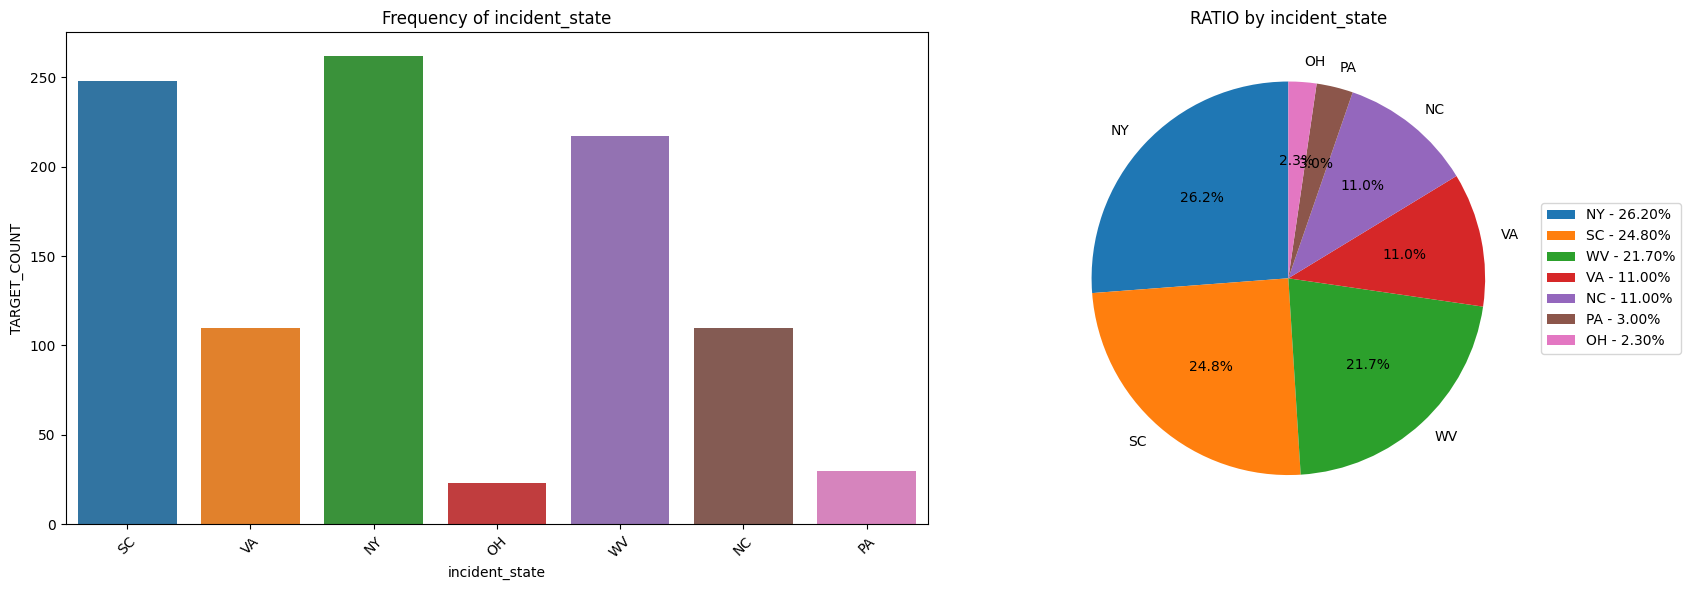

               incident_city  Ratio
incident_city                      
Springfield              157   15.7
Arlington                152   15.2
Columbus                 149   14.9
Northbend                145   14.5
Hillsdale                141   14.1
Riverwood                134   13.4
Northbrook               122   12.2
##########################################


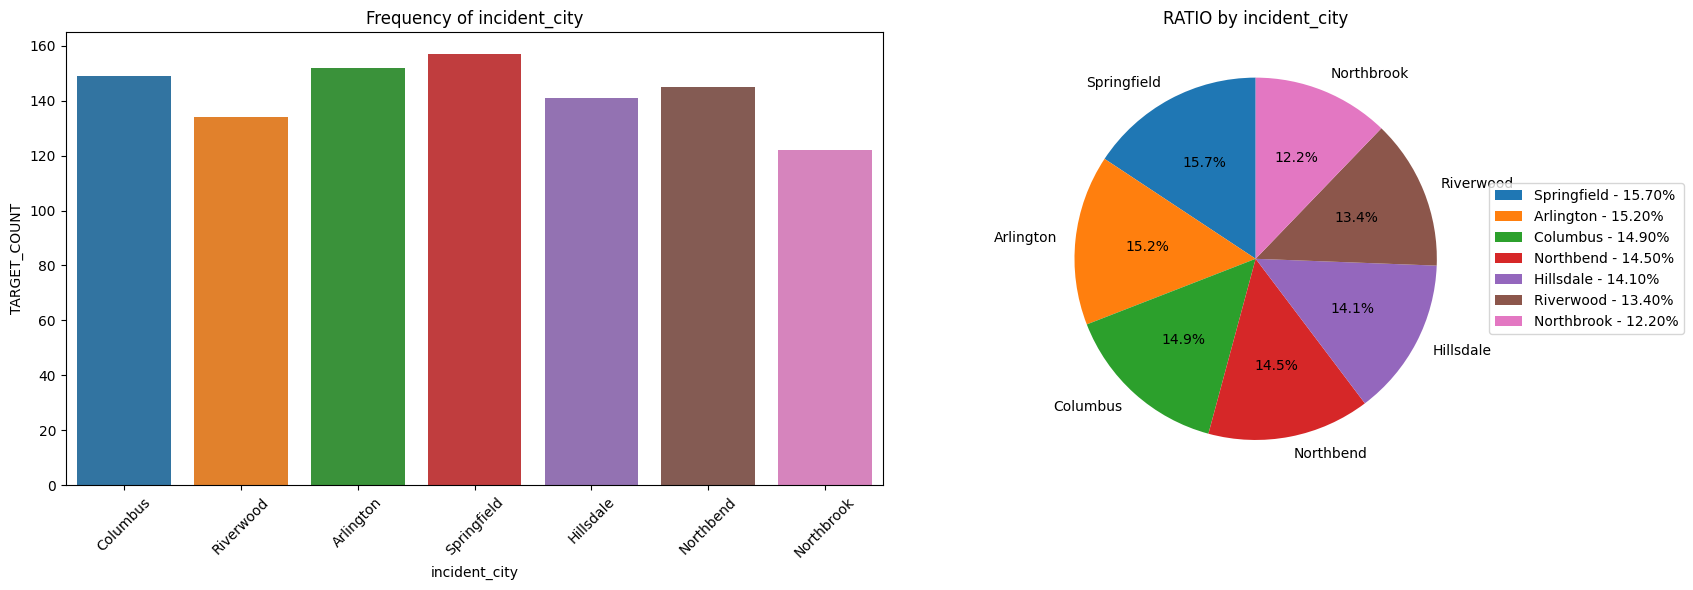

                 property_damage  Ratio
property_damage                        
unknown                      360   36.0
NO                           338   33.8
YES                          302   30.2
##########################################


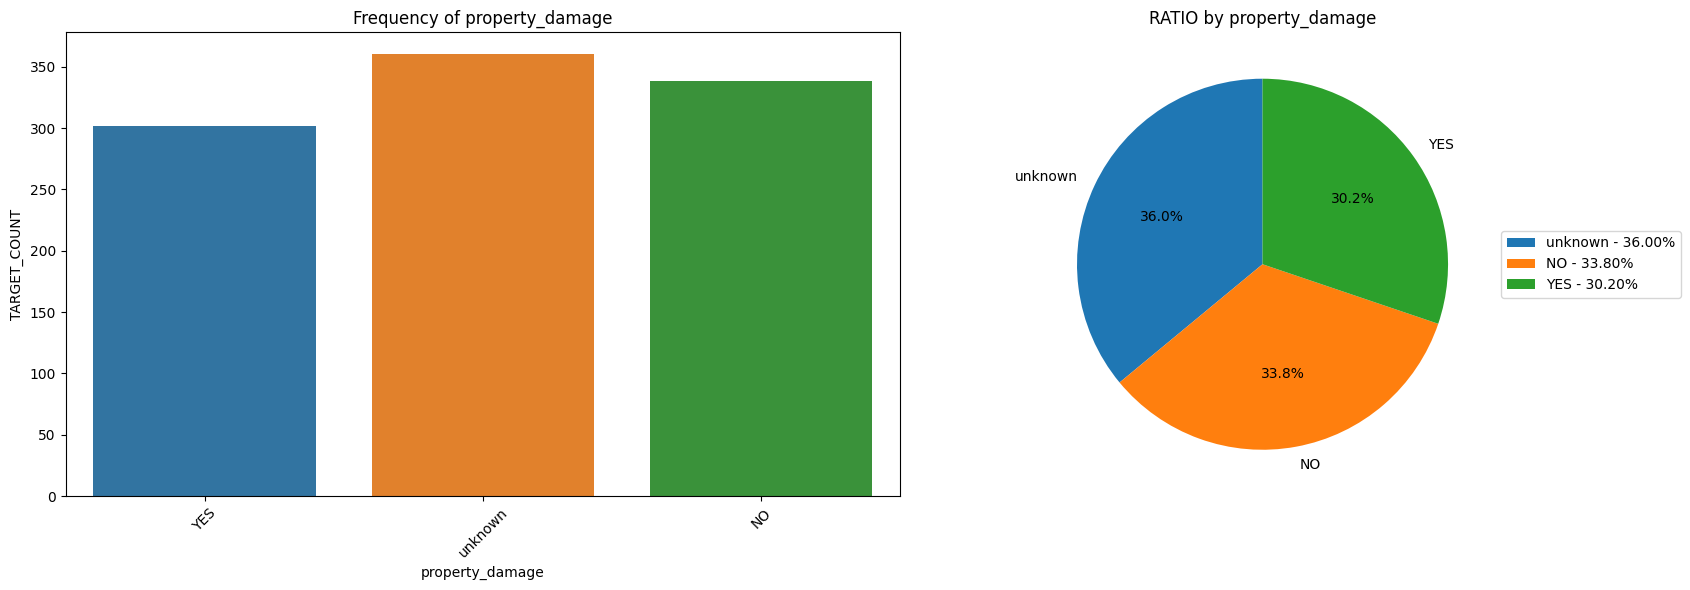

                         police_report_available  Ratio
police_report_available                                
unknown                                      343   34.3
NO                                           343   34.3
YES                                          314   31.4
##########################################


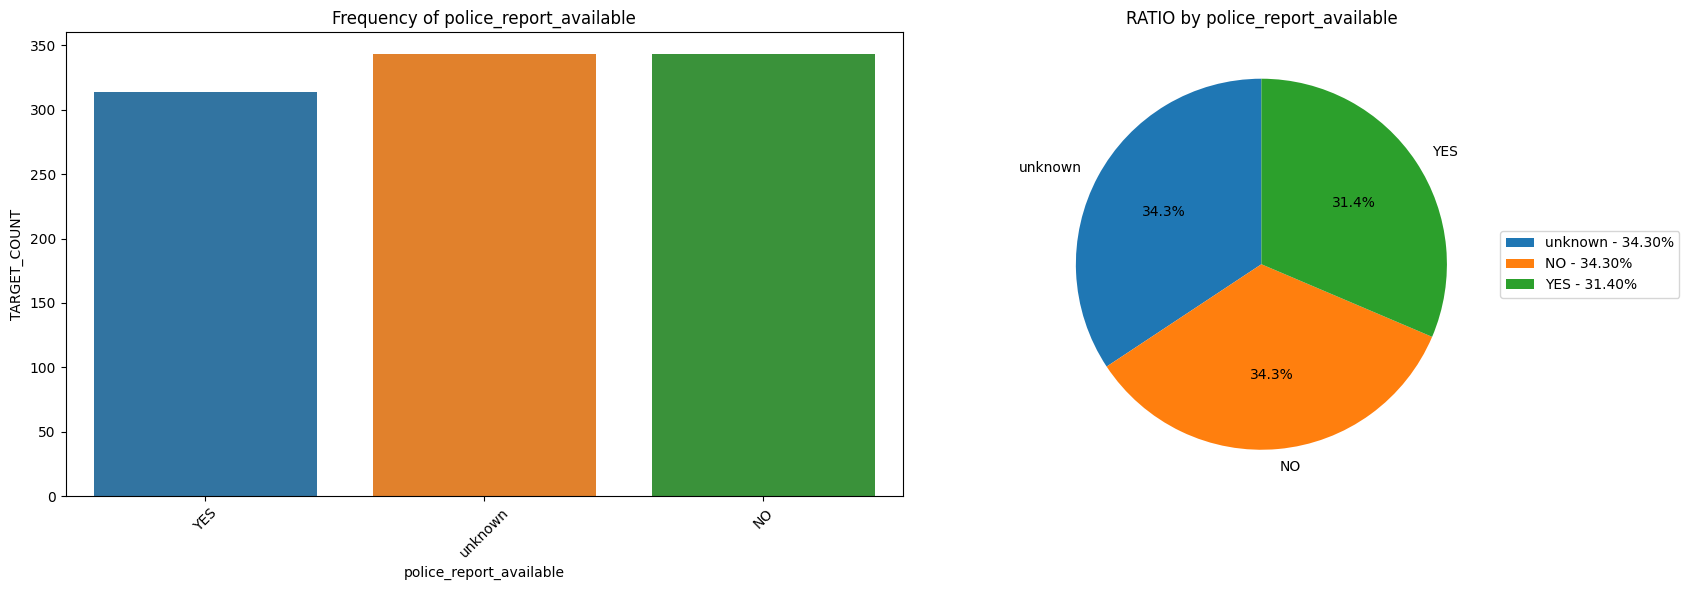

            auto_make  Ratio
auto_make                   
Saab               80    8.0
Dodge              80    8.0
Suburu             80    8.0
Nissan             78    7.8
Chevrolet          76    7.6
Ford               72    7.2
BMW                72    7.2
Toyota             70    7.0
Audi               69    6.9
Accura             68    6.8
Volkswagen         68    6.8
Jeep               67    6.7
Mercedes           65    6.5
Honda              55    5.5
##########################################


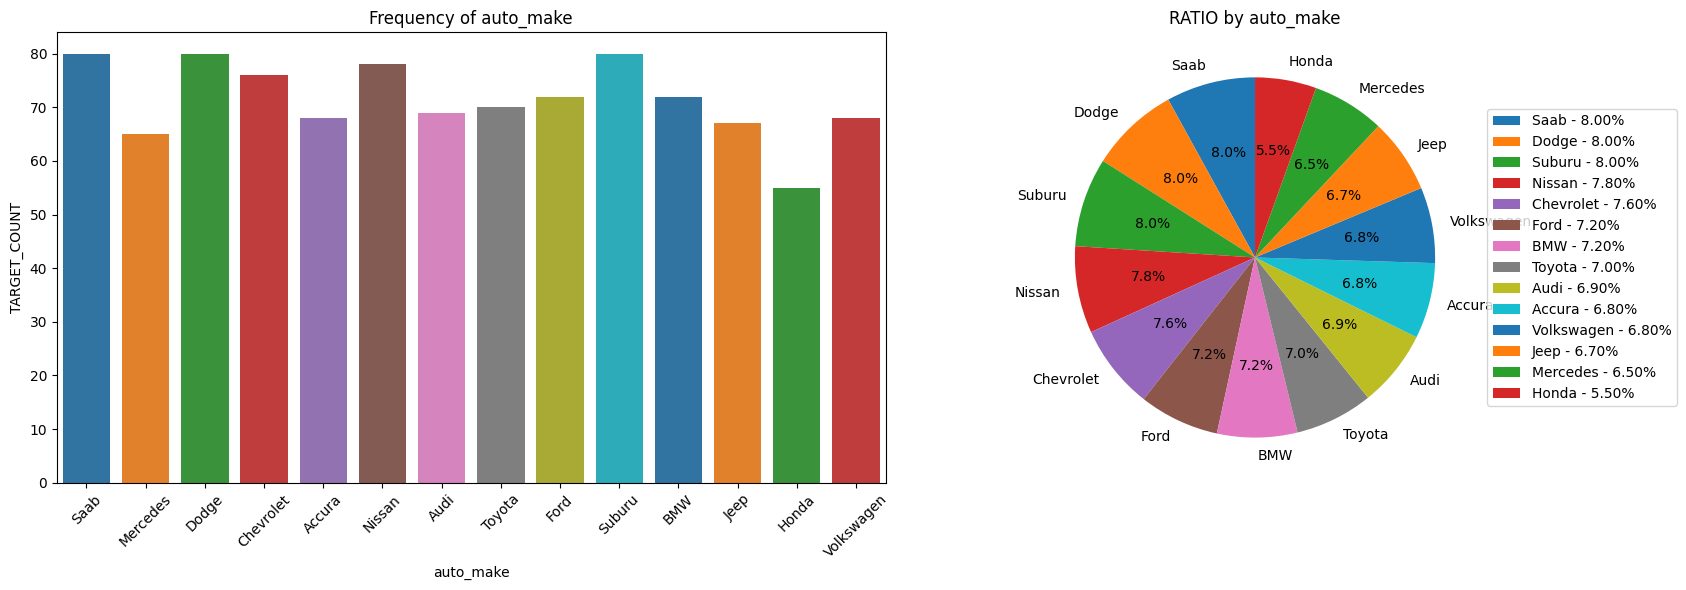

2024-10-08 23:09:18,241 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 23:09:18,243 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                   policy_deductable  Ratio
policy_deductable                          
1000                             351   35.1
500                              342   34.2
2000                             307   30.7
##########################################


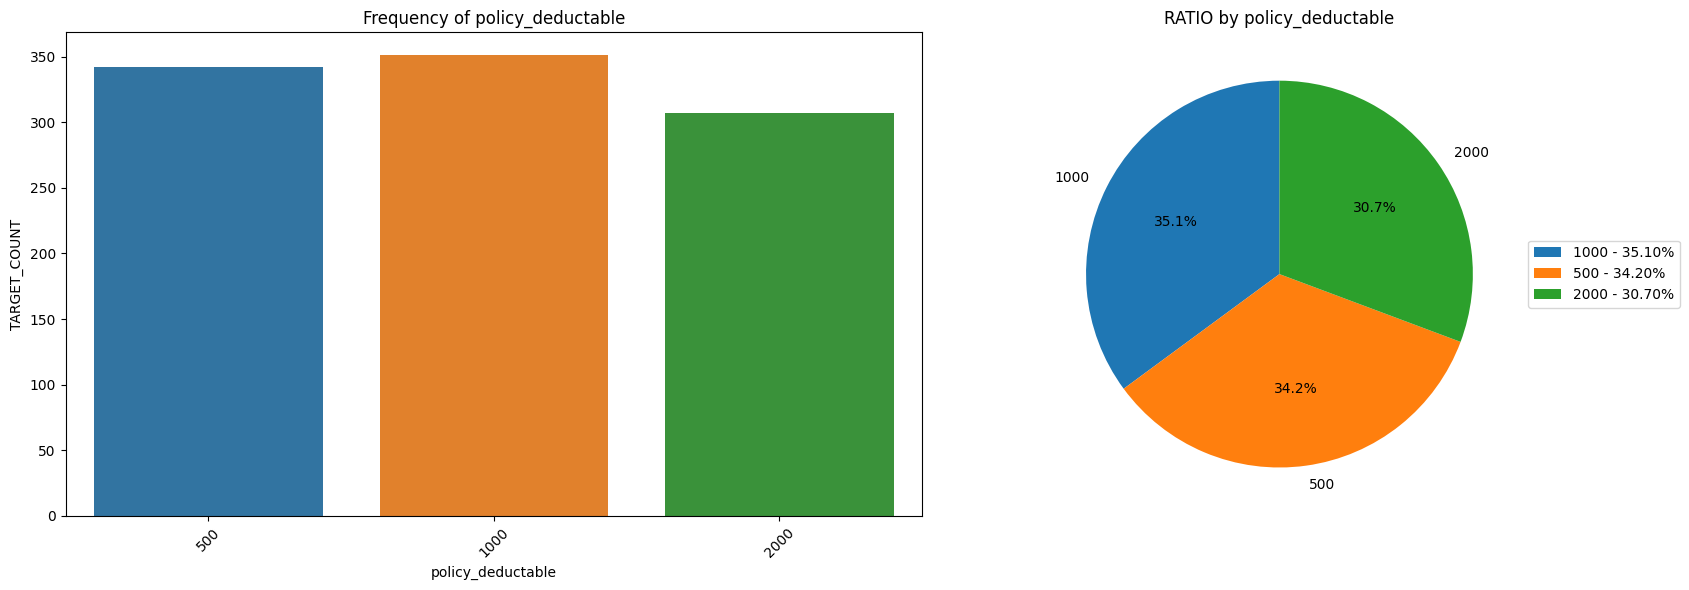

                             number_of_vehicles_involved  Ratio
number_of_vehicles_involved                                    
1                                                    581   58.1
3                                                    358   35.8
4                                                     31    3.1
2                                                     30    3.0
##########################################


2024-10-08 23:09:18,451 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 23:09:18,454 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


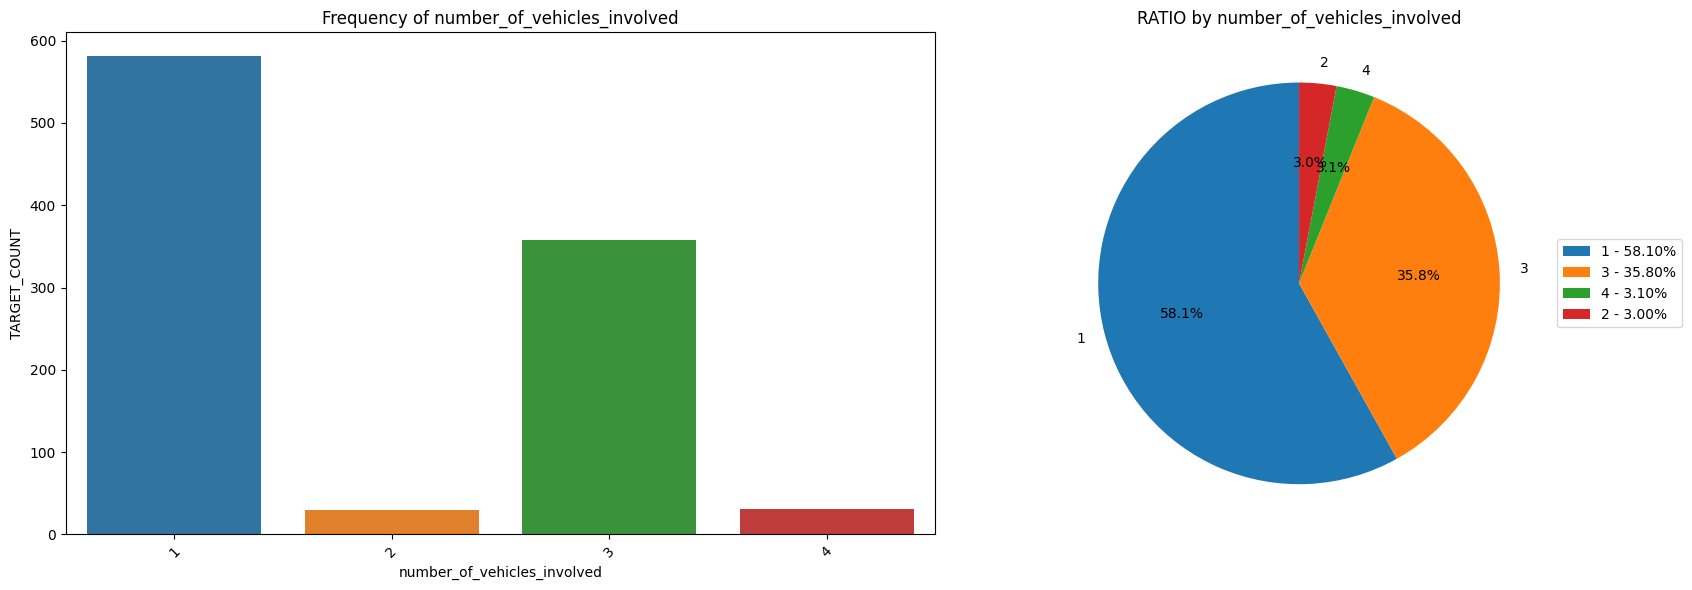

2024-10-08 23:09:18,593 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 23:09:18,595 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                 bodily_injuries  Ratio
bodily_injuries                        
0                            340   34.0
2                            332   33.2
1                            328   32.8
##########################################


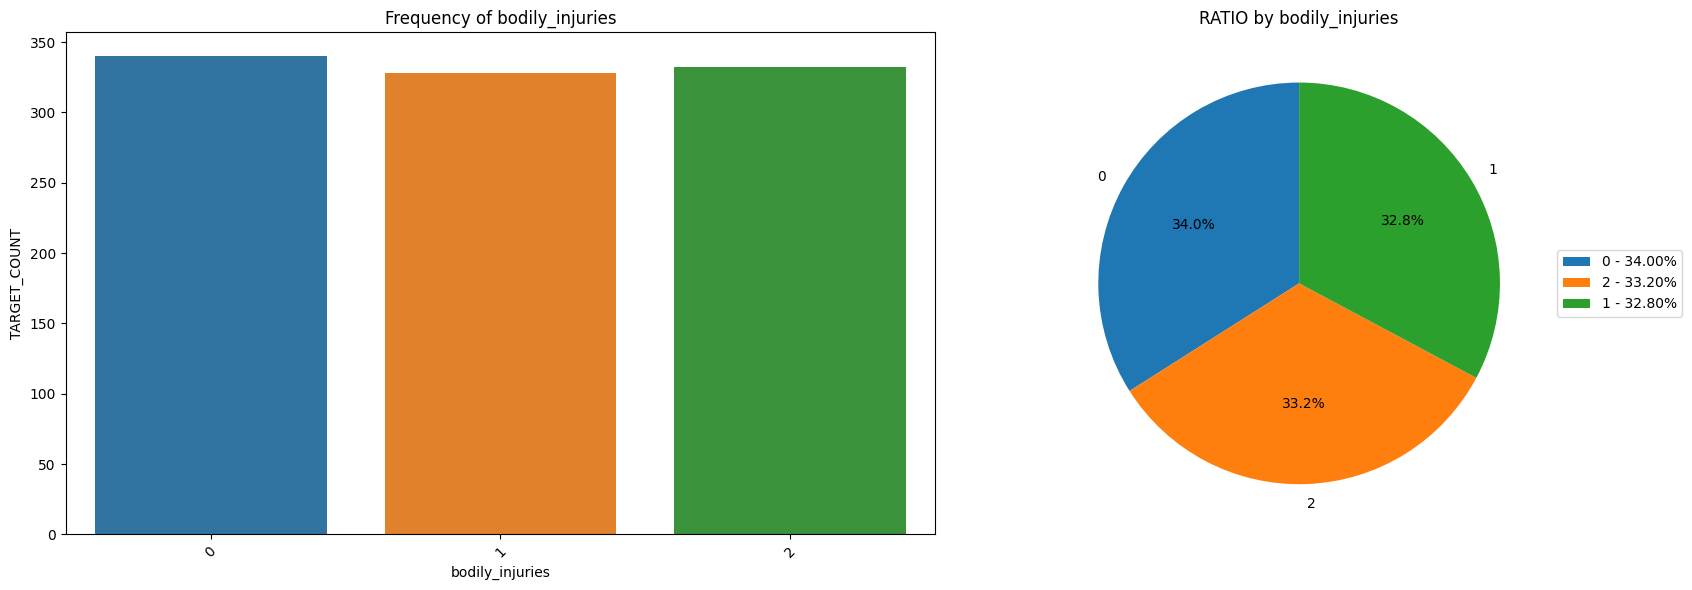

2024-10-08 23:09:18,725 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 23:09:18,727 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


           witnesses  Ratio
witnesses                  
1                258   25.8
2                250   25.0
0                249   24.9
3                243   24.3
##########################################


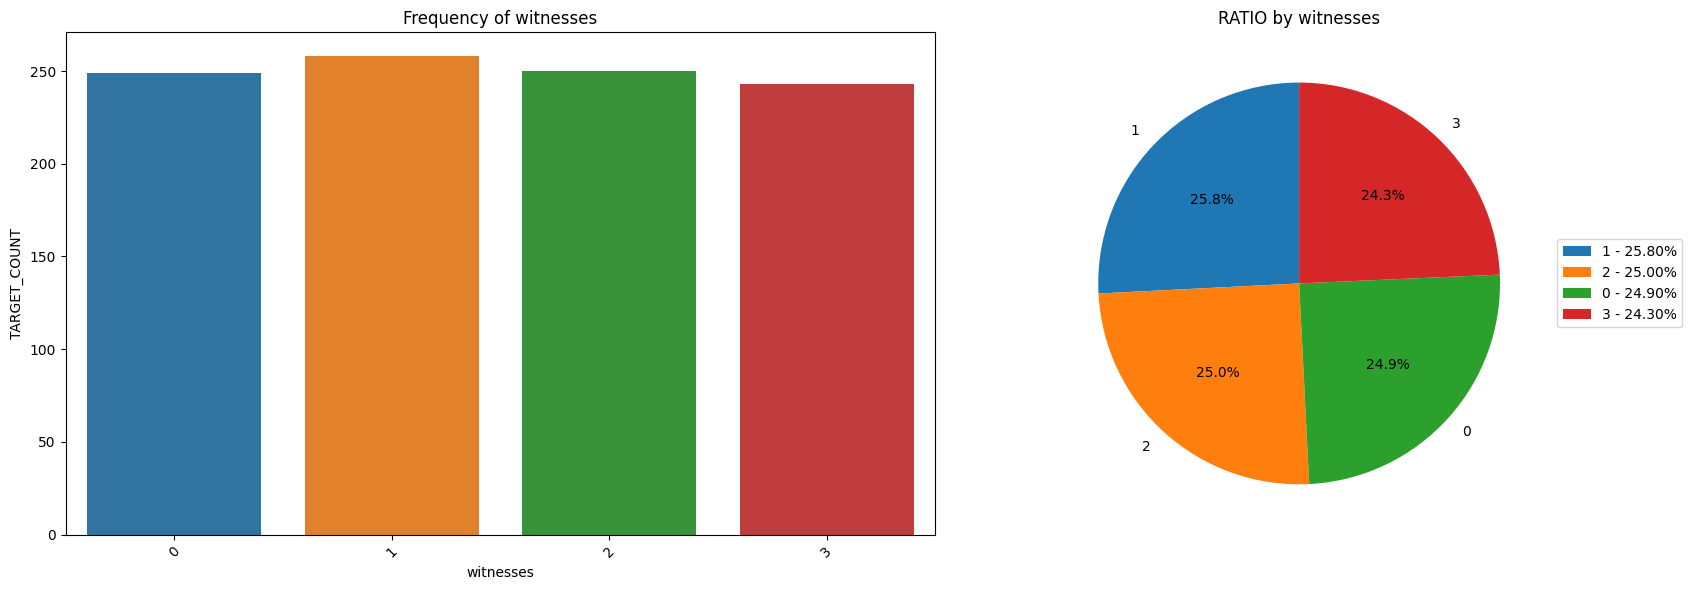

2024-10-08 23:09:18,860 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-08 23:09:18,862 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


                fraud_reported  Ratio
fraud_reported                       
0                          753   75.3
1                          247   24.7
##########################################


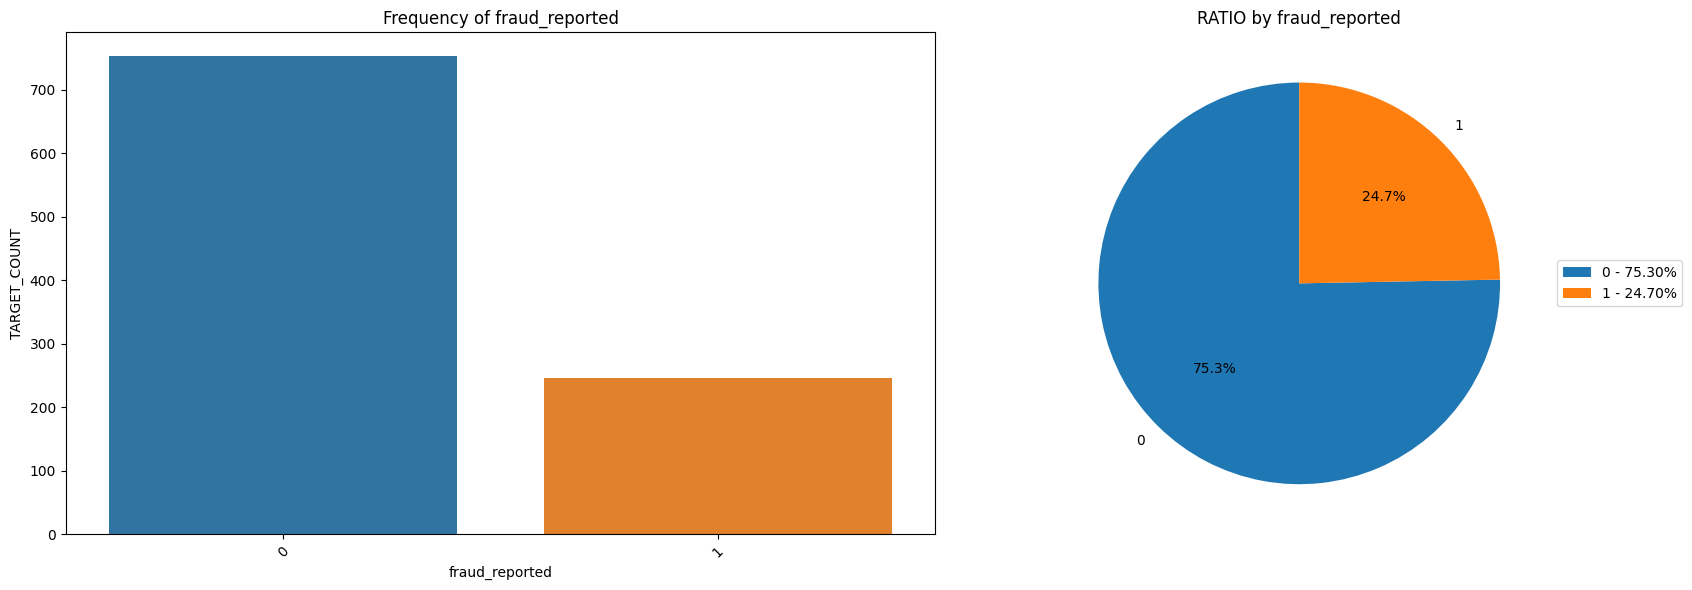

                        incident_period_of_day  Ratio
incident_period_of_day                               
afternoon                                  271   27.1
early_morning                              244   24.4
morning                                    239   23.9
night                                      131   13.1
evening                                    115   11.5
##########################################


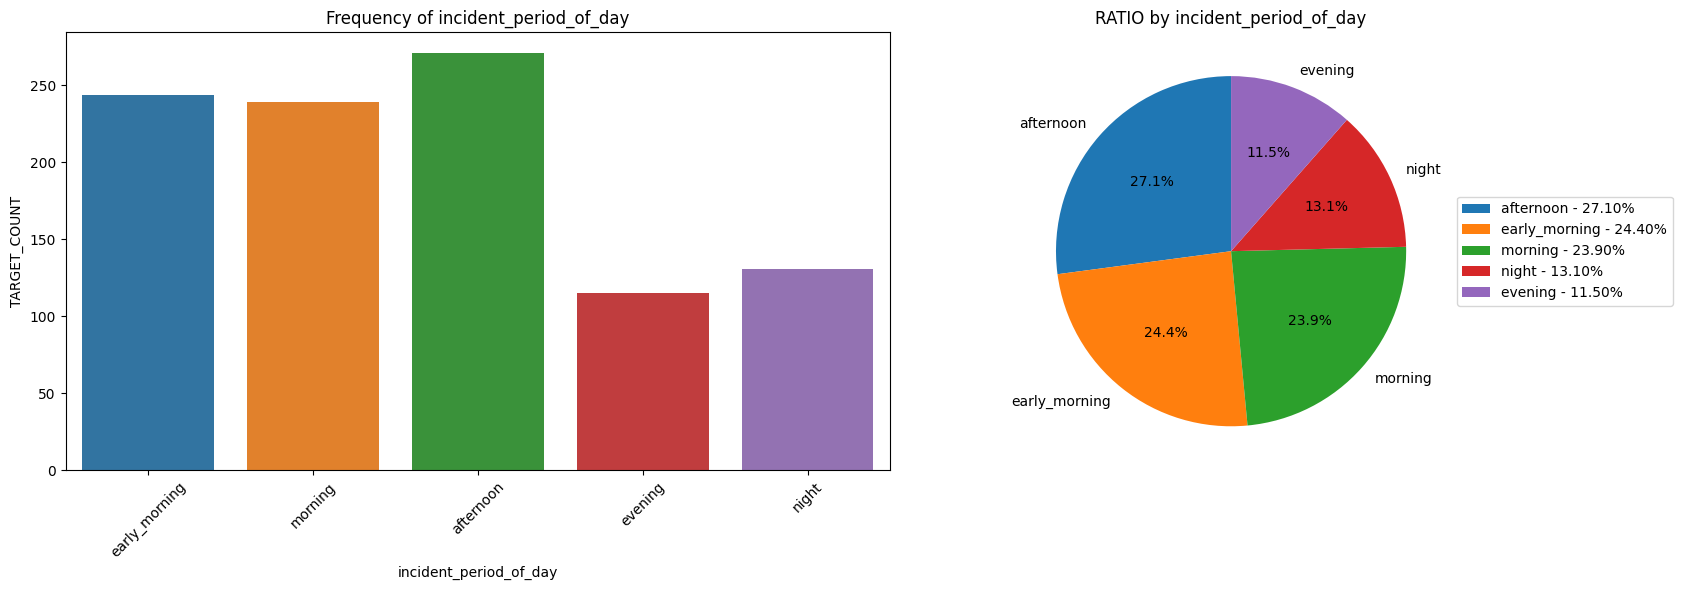

In [75]:
# Examination of categorical variables

for col in categorical_cols:
    cat_summary(data, col,plot=True)

Imbalanced dataset.

In [76]:
# Find categorical columns with '?' data points
cols_with_question_mark = [col for col in data.columns if data[col].eq('?').any()]
cols_with_question_mark


[]

In [78]:
# Examination of categorical variables

for col in cols_with_question_mark:
    cat_summary(data, col,plot=True)

The columns `collision_type`, `property_damage`, and `police_report_available` contain data with `?` data points. Two options to handle this:
* change all the `?` to `np.nan` and handle them as missing data points
* consider all the data points with `?` data points as a new data point with value `unknown` especially since the percentage is high and they are from the categorical columns

In [79]:
data[cols_with_question_mark] = data[cols_with_question_mark].replace('?', 'unknown')

In [80]:
data.isna().sum()

months_as_customer              0
age                             0
policy_state                    0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital_gains                   0
capital_loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make                       0
auto_model    

In [81]:
data[numerical_cols].describe().T

count          mean           std         min  \
months_as_customer     1000.0  2.039540e+02  1.151132e+02        0.00   
age                    1000.0  3.894800e+01  9.140287e+00       19.00   
policy_annual_premium  1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit         1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital_gains          1000.0  2.512610e+04  2.787219e+04        0.00   
capital_loss           1000.0 -2.679370e+04  2.810410e+04  -111100.00   
total_claim_amount     1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim           1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim         1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim          1000.0  3.792895e+04  1.888625e+04       70.00   
vehicle_age            1000.0  1.889700e+01  6.015861e+00        9.00   

                              25%      50%        75%          max  
months_as_customer       115.7500    199.5    276.250       479.00  
age                       32.0000     38.0     44.000        64.00  
policy_annual_premium   1089.6075   1257.2   1415.695      2047.59  
umbrella_limit             0.0000      0.0      0.000  10000000.00  
capital_gains              0.0000      0.0  51025.000    100500.00  
capital_loss          -51500.0000 -23250.0      0.000         0.00  
total_claim_amount     41812.5000  58055.0  70592.500    114920.00  
injury_claim            4295.0000   6775.0  11305.000     21450.00  
property_claim          4445.0000   6750.0  10885.000     23670.00  
vehicle_claim          30292.5000  42100.0  50822.500     79560.00  
vehicle_age               14.0000     19.0     24.000        29.00

Numerical Column: months_as_customer
##########################################
count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
5%         28.900000
10%        58.900000
20%        98.800000
30%       130.000000
40%       161.600000
50%       199.500000
60%       233.000000
70%       261.000000
80%       290.000000
90%       371.000000
95%       429.050000
99%       467.010000
max       479.000000
Name: months_as_customer, dtype: float64
##########################################


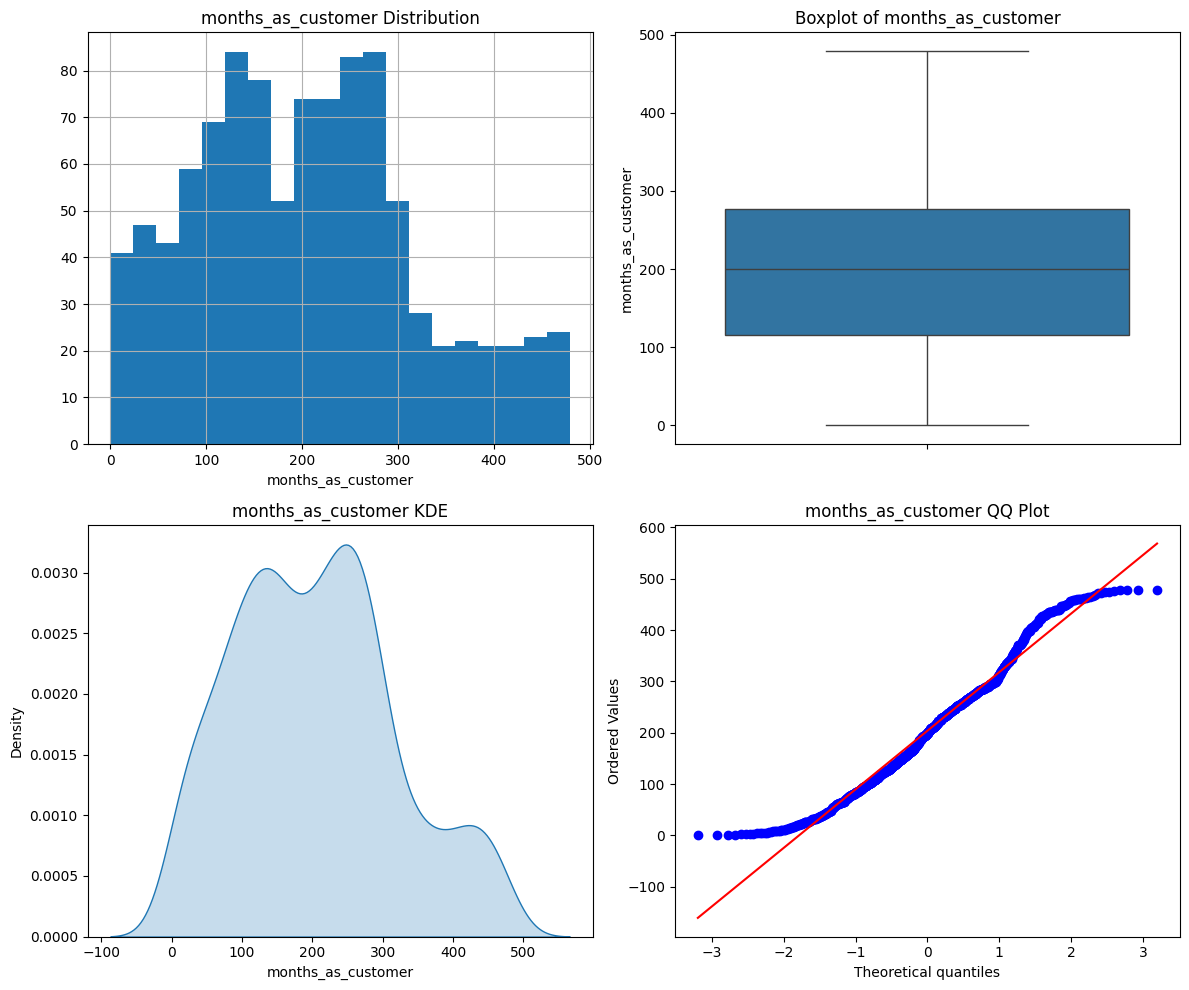

Numerical Column: age
##########################################
count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
5%         26.000000
10%        28.000000
20%        31.000000
30%        33.000000
40%        36.000000
50%        38.000000
60%        41.000000
70%        43.000000
80%        46.000000
90%        53.000000
95%        57.000000
99%        61.000000
max        64.000000
Name: age, dtype: float64
##########################################


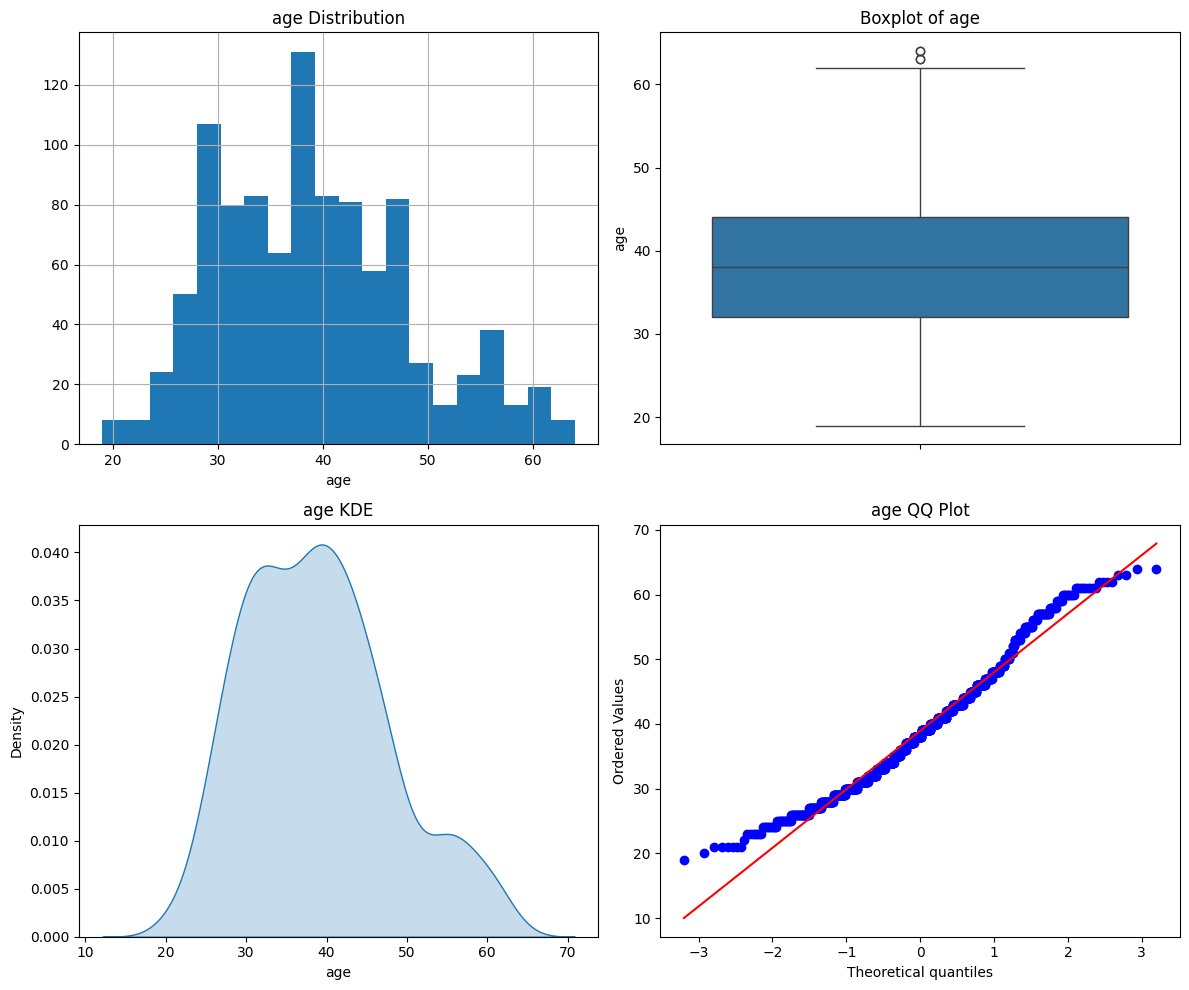

Numerical Column: policy_annual_premium
##########################################
count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
5%        855.112000
10%       953.900000
20%      1050.656000
30%      1124.663000
40%      1197.974000
50%      1257.200000
60%      1322.372000
70%      1385.327000
80%      1454.674000
90%      1564.724000
95%      1653.443500
99%      1851.876500
max      2047.590000
Name: policy_annual_premium, dtype: float64
##########################################


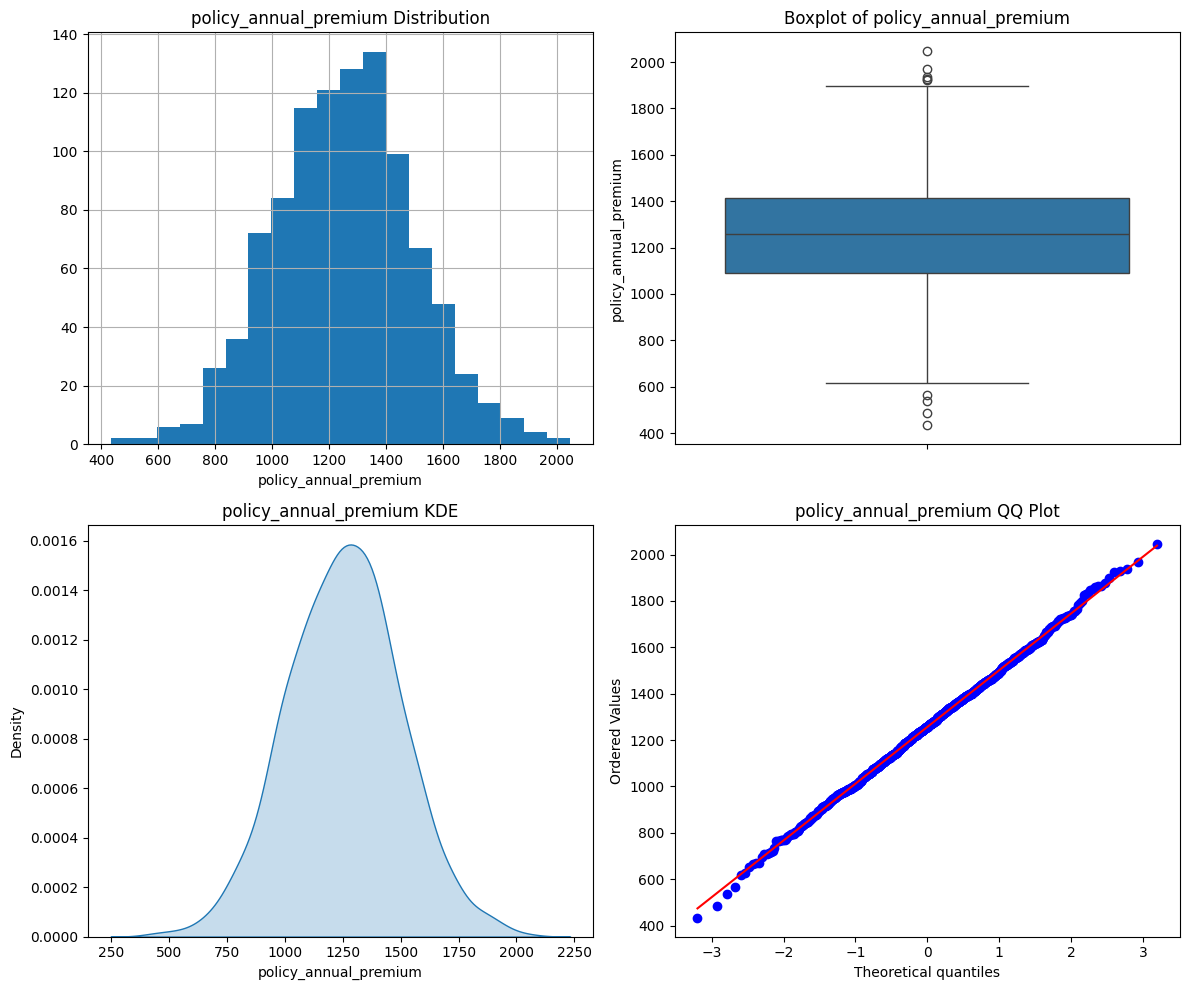

Numerical Column: umbrella_limit
##########################################
count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
5%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      0.000000e+00
80%      2.000000e+06
90%      6.000000e+06
95%      6.000000e+06
99%      8.000000e+06
max      1.000000e+07
Name: umbrella_limit, dtype: float64
##########################################


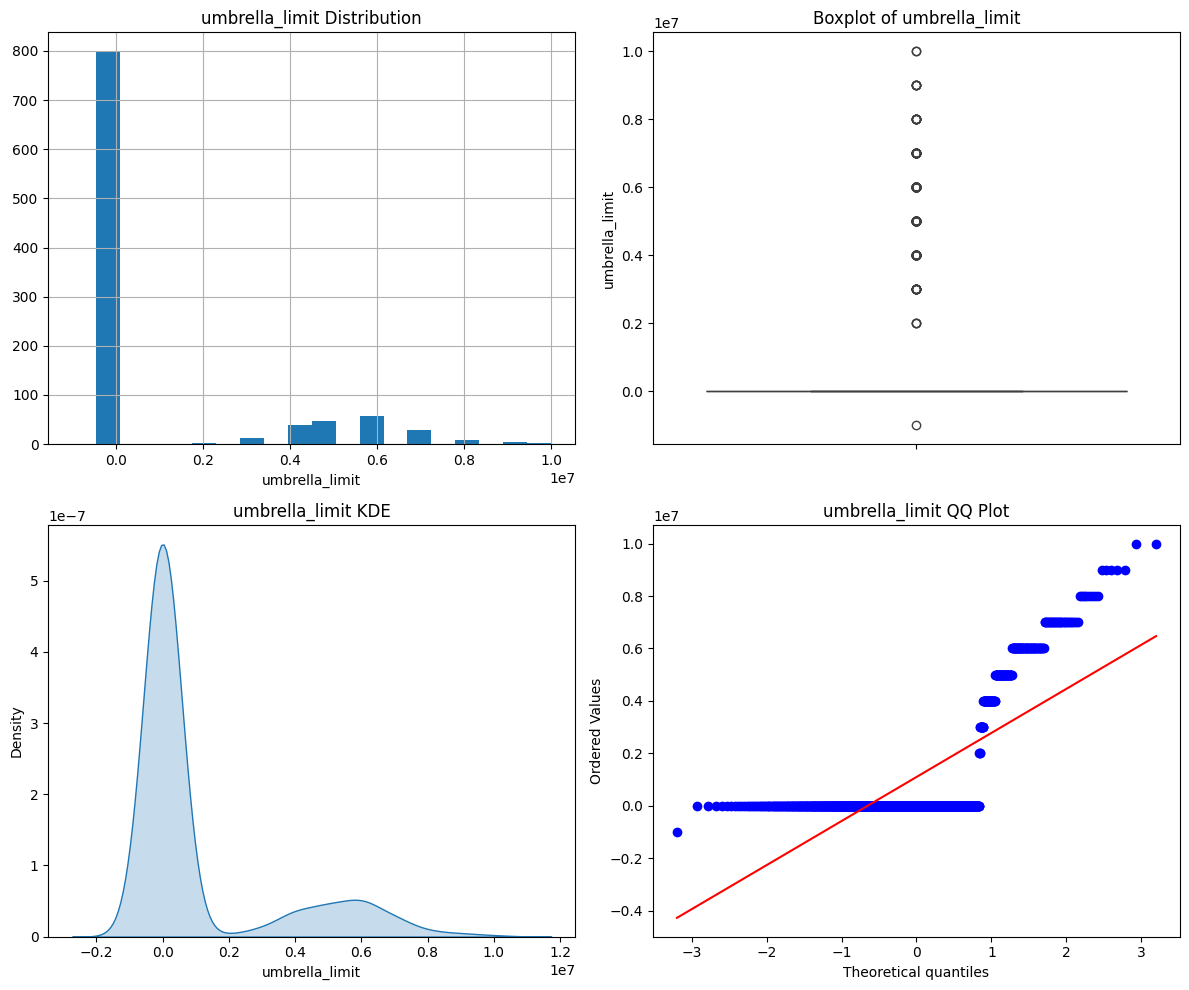

Numerical Column: capital_gains
##########################################
count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
5%            0.000000
10%           0.000000
20%           0.000000
30%           0.000000
40%           0.000000
50%           0.000000
60%       36900.000000
70%       46500.000000
80%       54100.000000
90%       64420.000000
95%       70615.000000
99%       83603.000000
max      100500.000000
Name: capital_gains, dtype: float64
##########################################


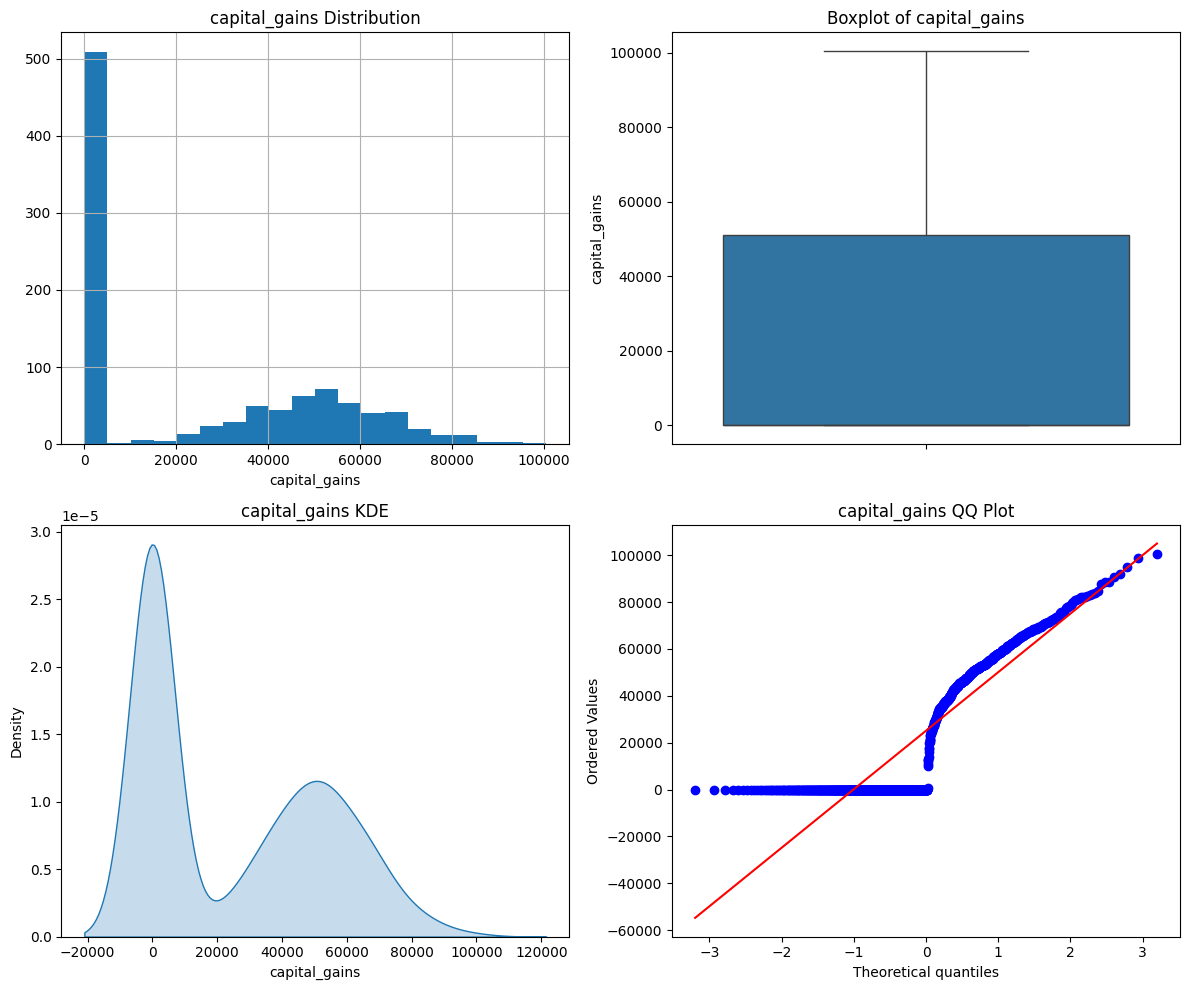

Numerical Column: capital_loss
##########################################
count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
5%       -72305.000000
10%      -65510.000000
20%      -55420.000000
30%      -48530.000000
40%      -39700.000000
50%      -23250.000000
60%           0.000000
70%           0.000000
80%           0.000000
90%           0.000000
95%           0.000000
99%           0.000000
max           0.000000
Name: capital_loss, dtype: float64
##########################################


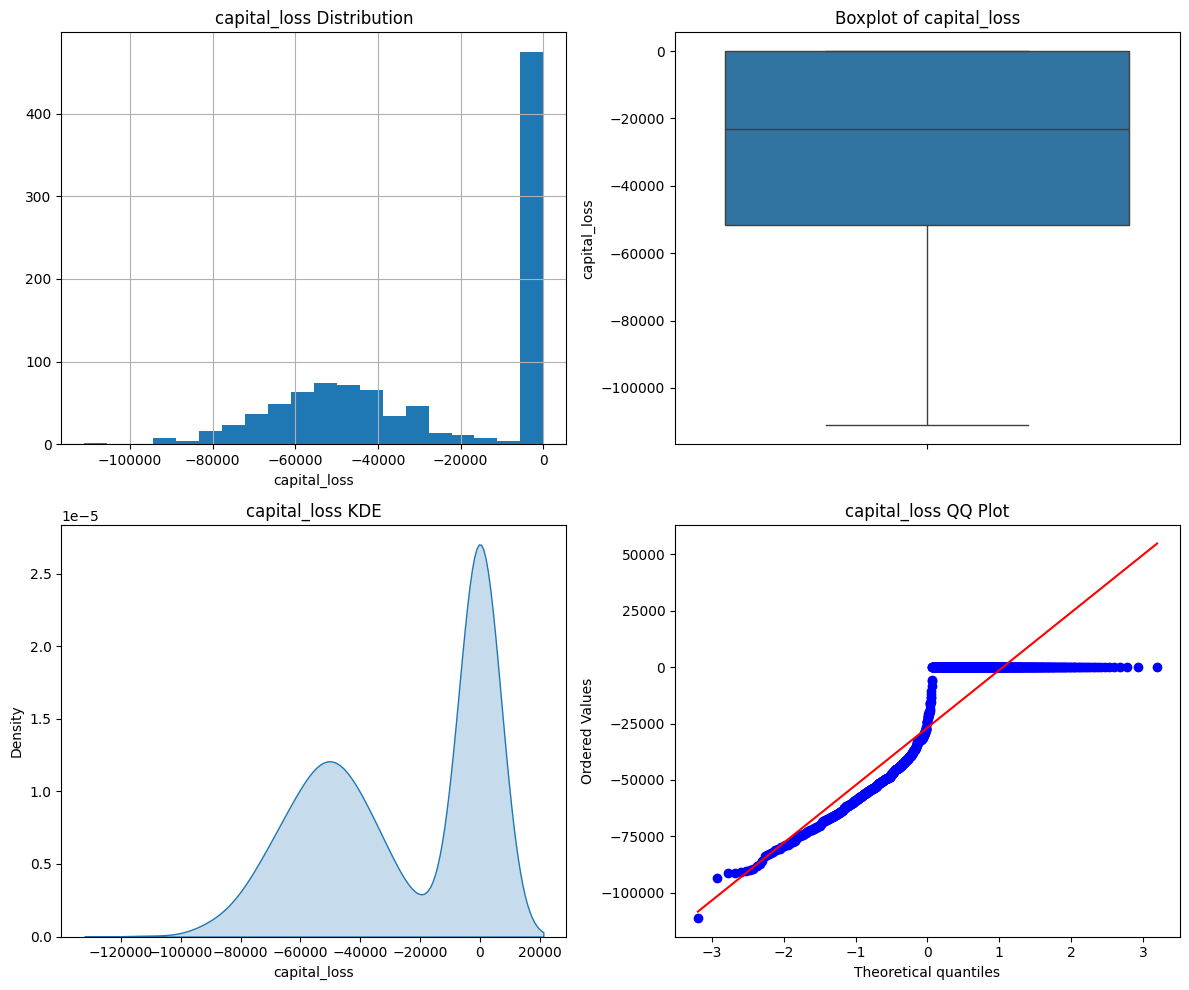

Numerical Column: total_claim_amount
##########################################
count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
5%         4320.00000
10%        5756.00000
20%       33344.00000
30%       46842.00000
40%       53280.00000
50%       58055.00000
60%       62888.00000
70%       68012.00000
80%       74360.00000
90%       81364.00000
95%       88413.00000
99%      101018.50000
max      114920.00000
Name: total_claim_amount, dtype: float64
##########################################


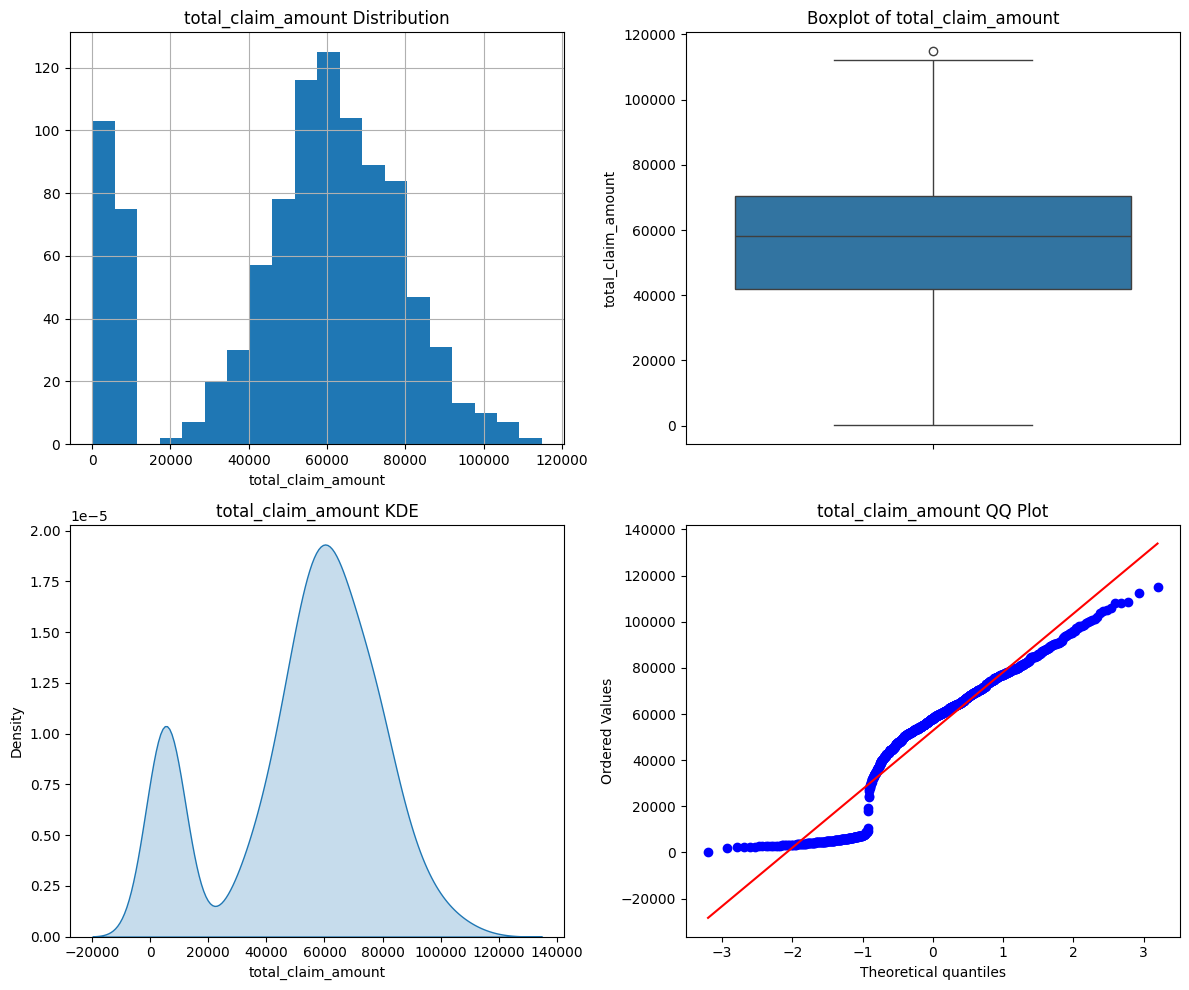

Numerical Column: injury_claim
##########################################
count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
5%         450.000000
10%        639.000000
20%       2138.000000
30%       5040.000000
40%       5910.000000
50%       6775.000000
60%       7874.000000
70%      10160.000000
80%      12300.000000
90%      14380.000000
95%      15662.000000
99%      17682.000000
max      21450.000000
Name: injury_claim, dtype: float64
##########################################


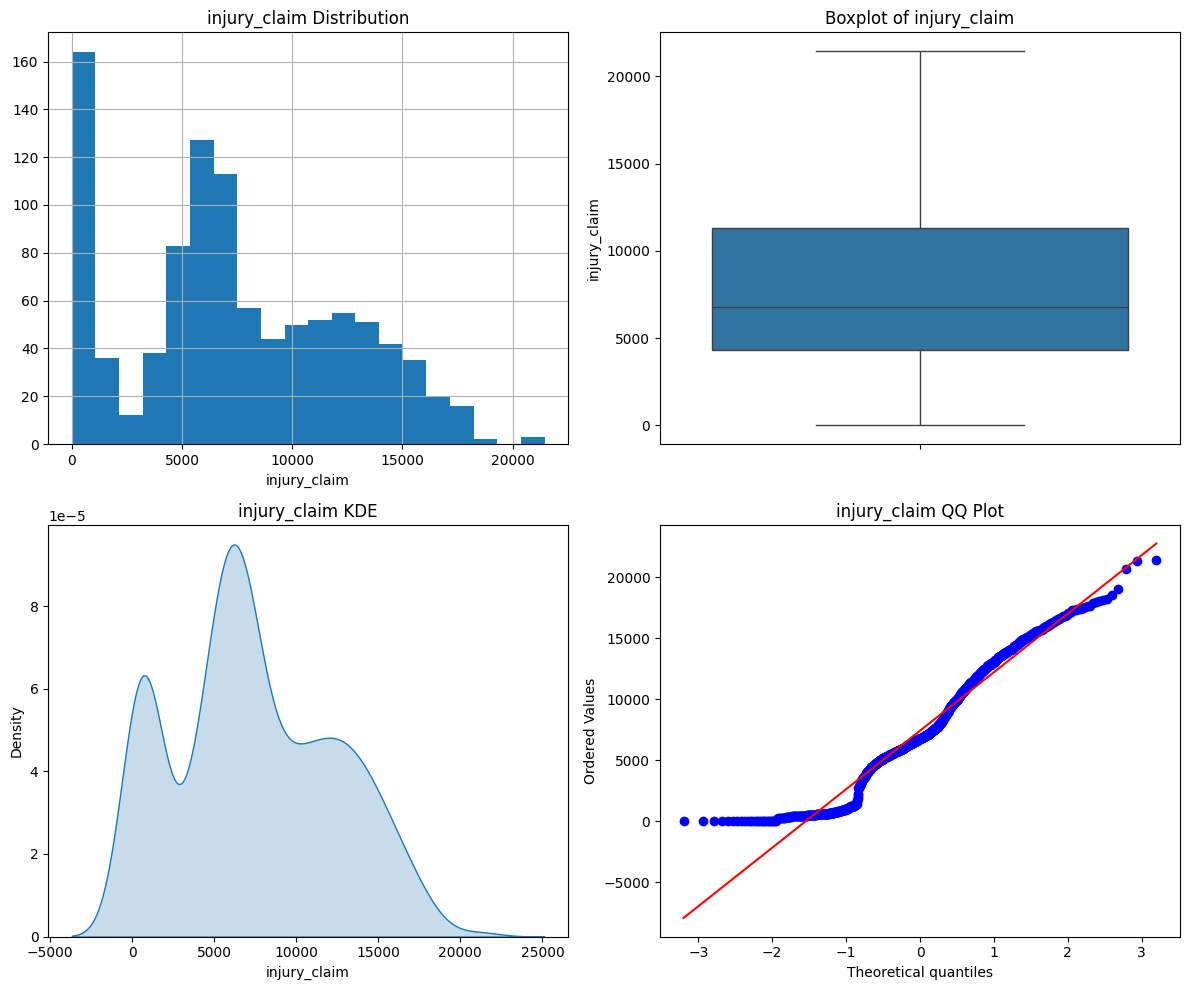

Numerical Column: property_claim
##########################################
count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
5%         450.000000
10%        650.000000
20%       3158.000000
30%       5080.000000
40%       5980.000000
50%       6750.000000
60%       7760.000000
70%       9986.000000
80%      11708.000000
90%      14142.000000
95%      15540.000000
99%      19471.800000
max      23670.000000
Name: property_claim, dtype: float64
##########################################


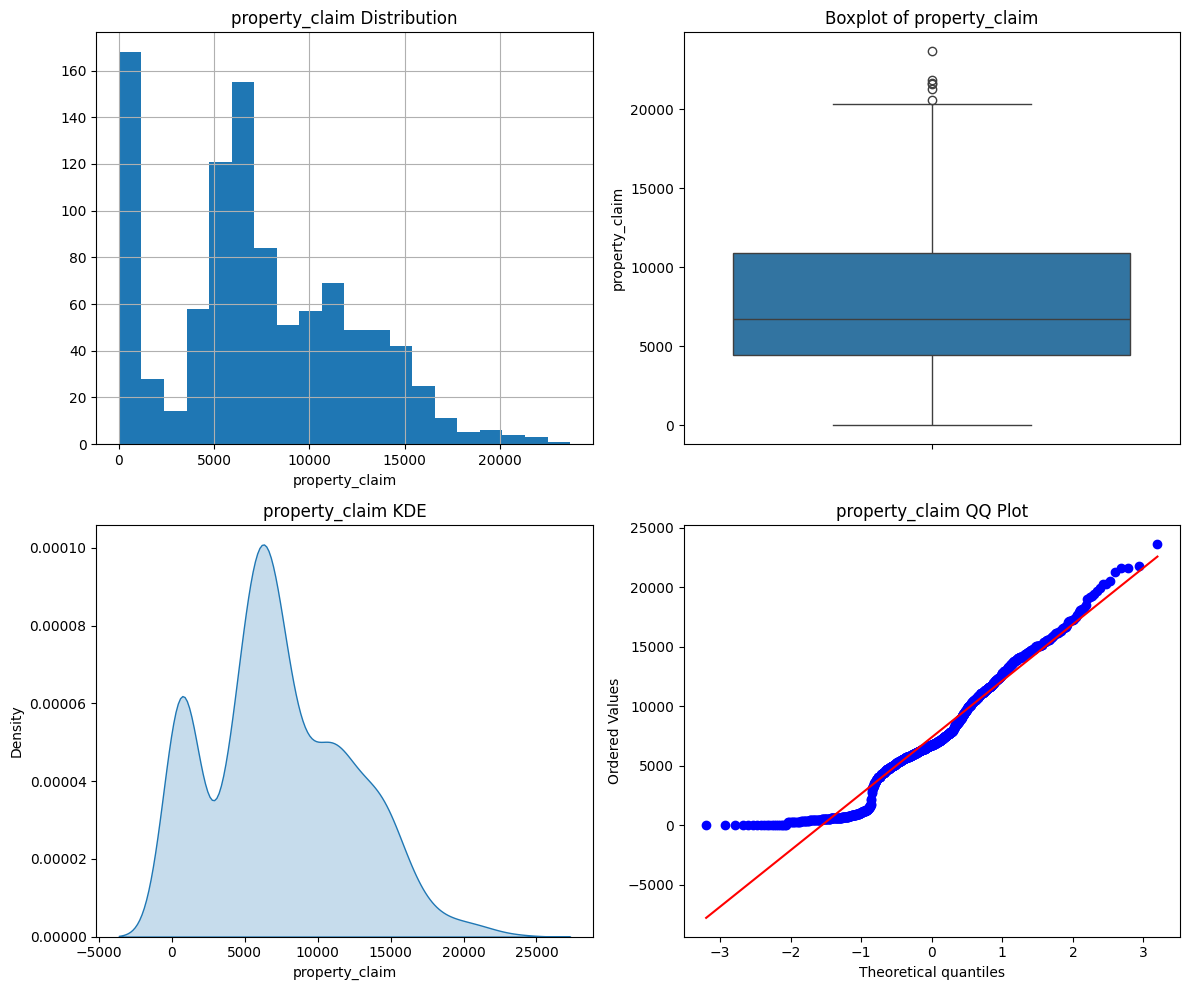

Numerical Column: vehicle_claim
##########################################
count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
5%        3273.500000
10%       4157.000000
20%      24392.000000
30%      33600.000000
40%      38232.000000
50%      42100.000000
60%      45360.000000
70%      48909.000000
80%      52960.000000
90%      58728.000000
95%      63094.500000
99%      73263.600000
max      79560.000000
Name: vehicle_claim, dtype: float64
##########################################


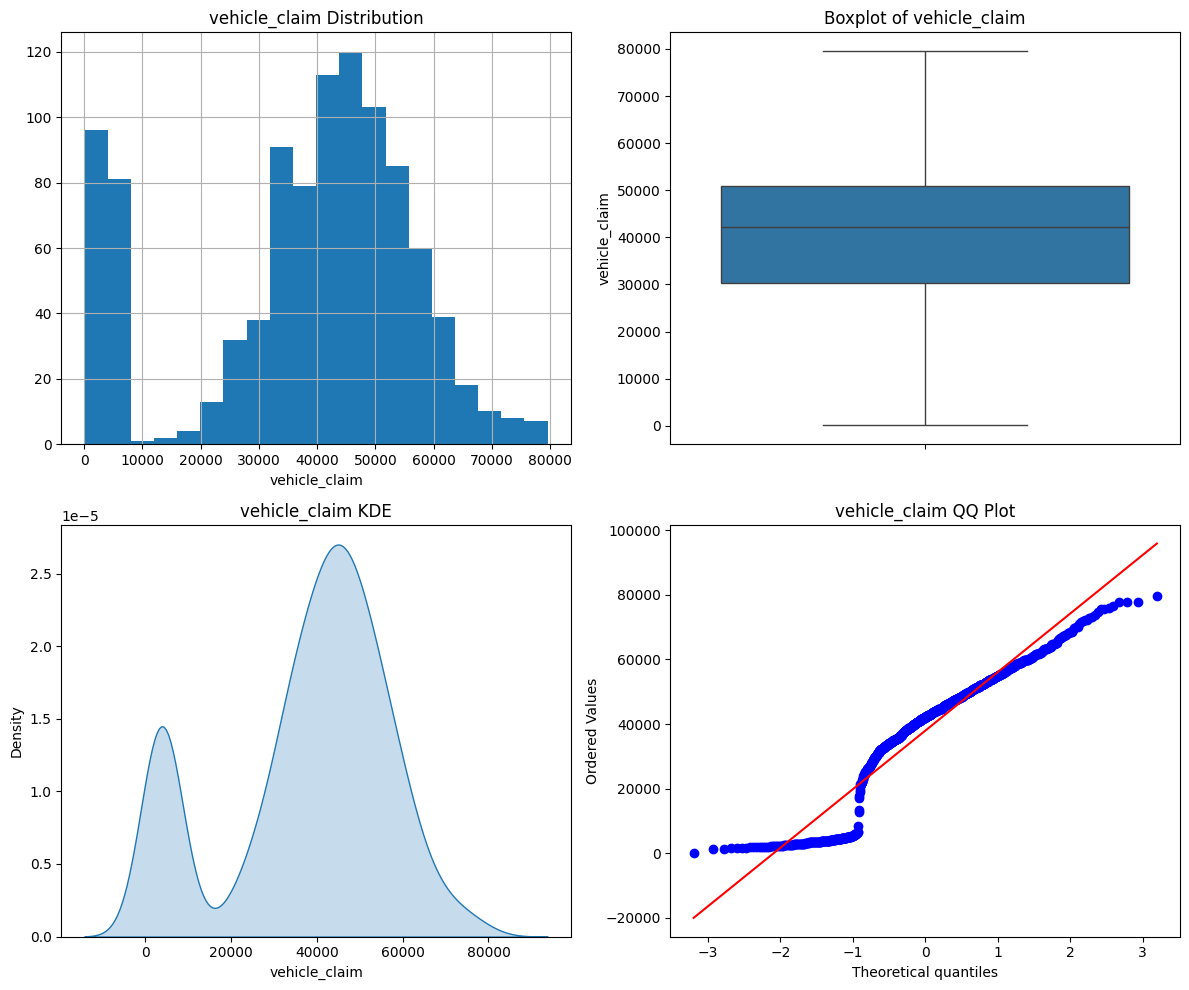

Numerical Column: vehicle_age
##########################################
count    1000.000000
mean       18.897000
std         6.015861
min         9.000000
5%         10.000000
10%        11.000000
20%        13.000000
30%        15.000000
40%        17.000000
50%        19.000000
60%        21.000000
70%        23.000000
80%        25.000000
90%        27.000000
95%        29.000000
99%        29.000000
max        29.000000
Name: vehicle_age, dtype: float64
##########################################


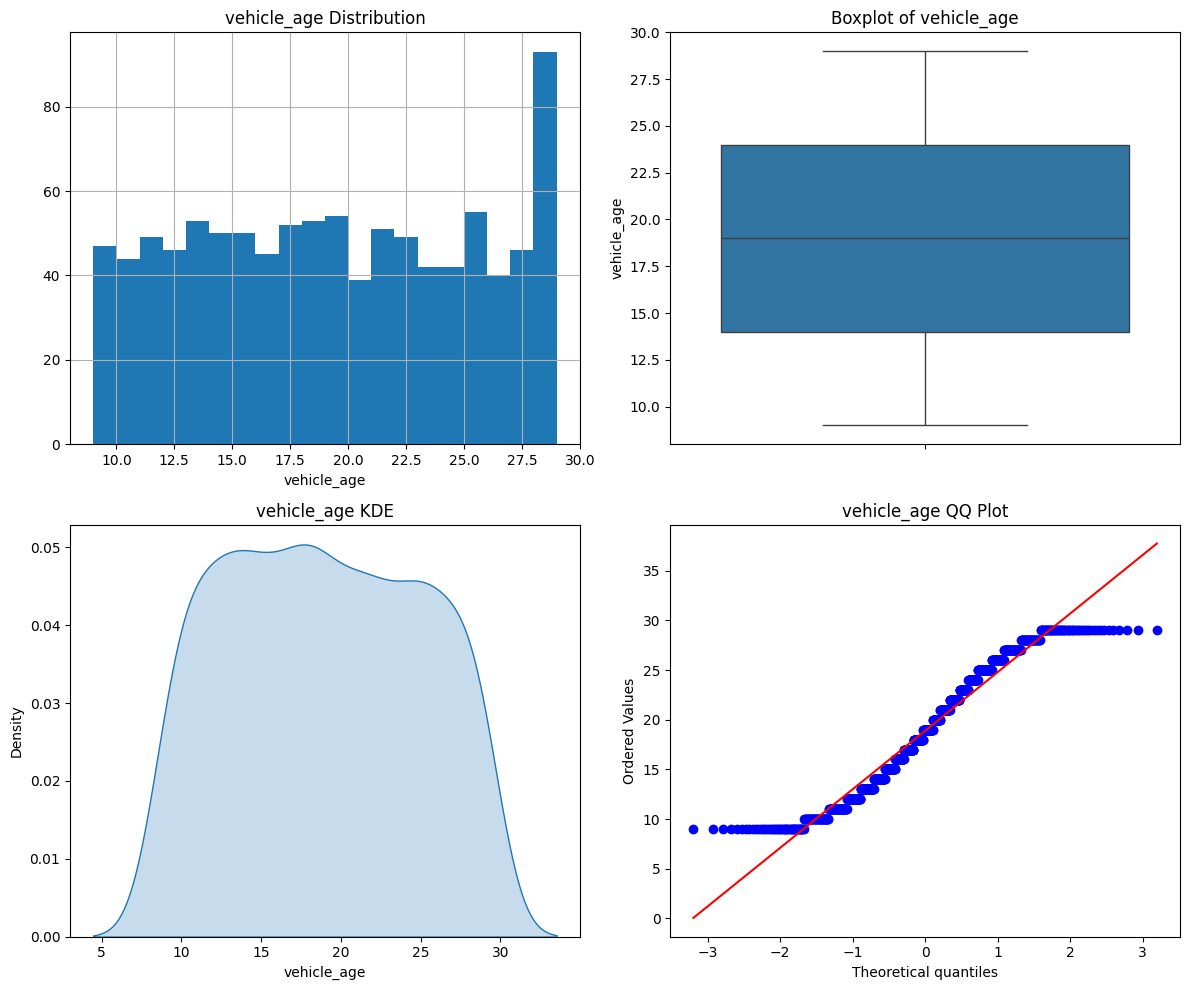

In [82]:
for col in numerical_cols:
    num_summary(dataframe=data,
                numerical_col= col,
                plot= True)

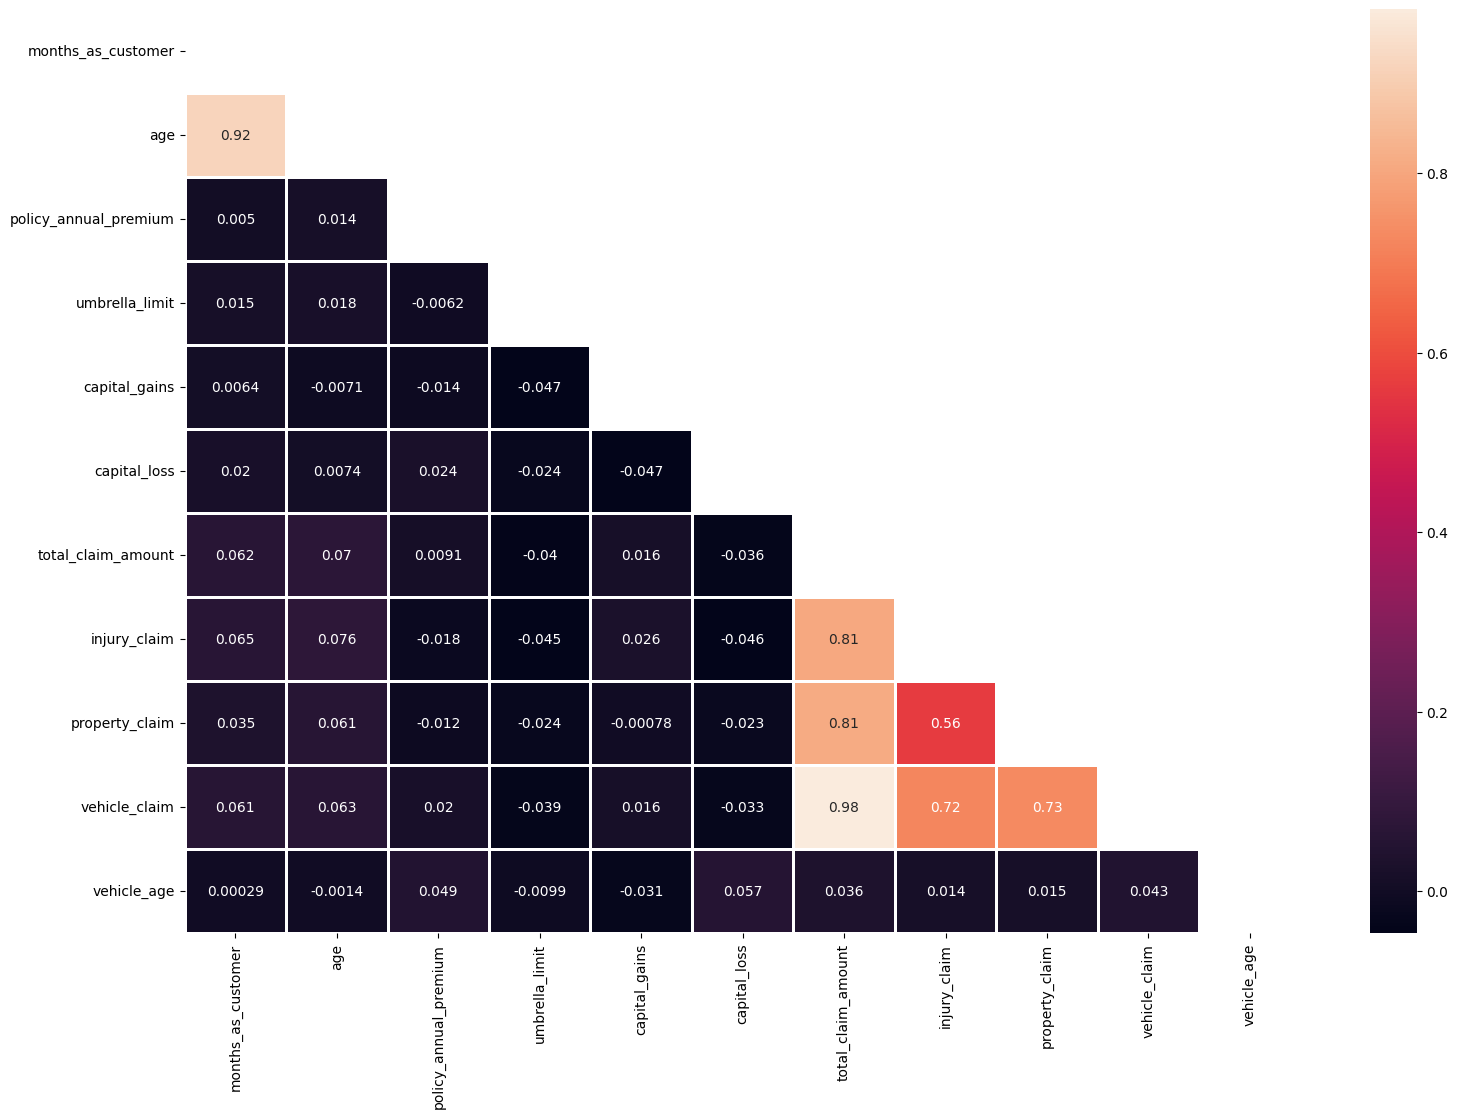

In [83]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = data[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between `age` and `months_as_customer`.We could consider dropping the `age` column. Also there is high correlation between `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. Again we could consider dropping the `total_claim_amount` column.

In [84]:
data.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital_gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital_loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft          unknown      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft          unknown      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                   NaN             NY     Arlington   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1         unknown                0          0   
2                            3              NO                2          3   
3                            1         unknown                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                 unknown                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  fraud_reported  vehicle_age  \
0          52080       Saab        92x               1           20   
1           3510   Mercedes       E400               1           17   
2          23100      Dodge        RAM               0           17   
3          50720  Chevrolet      Tahoe               1           10   
4           4550     Accura        RSX               0           15   

  incident_period_of_day  
0          early_morning  
1                morning  
2                morning  
3          early_morning  
4                evening

In [87]:
skewed_features = ['umbrella_limit', 'capital_gains', 'capital_loss']

# Update categorical_features to exclude columns in skewed_features, cols_with_question_mark, numerical_features, and target_col
categorical_features = [
    col for col in categorical_cols + cols_with_question_mark # Start from already filtered categorical features
    if col not in (skewed_features  + numerical_cols + [target_col])
]

# Update numerical_features to exclude skewed features, cols_with_question_mark, and target_col
numerical_features = [
    col for col in numerical_cols 
    if col not in (skewed_features + cols_with_question_mark + [target_col])  # Use a list for target_col
]

print(f"{skewed_features=}")
print(f"{categorical_features=}")
print(f"{numerical_features=}")
print(f"{target_col=}")



skewed_features=['umbrella_limit', 'capital_gains', 'capital_loss']
categorical_features=['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'incident_period_of_day']
numerical_features=['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'vehicle_age']
target_col='fraud_reported'


## Feature Transformation

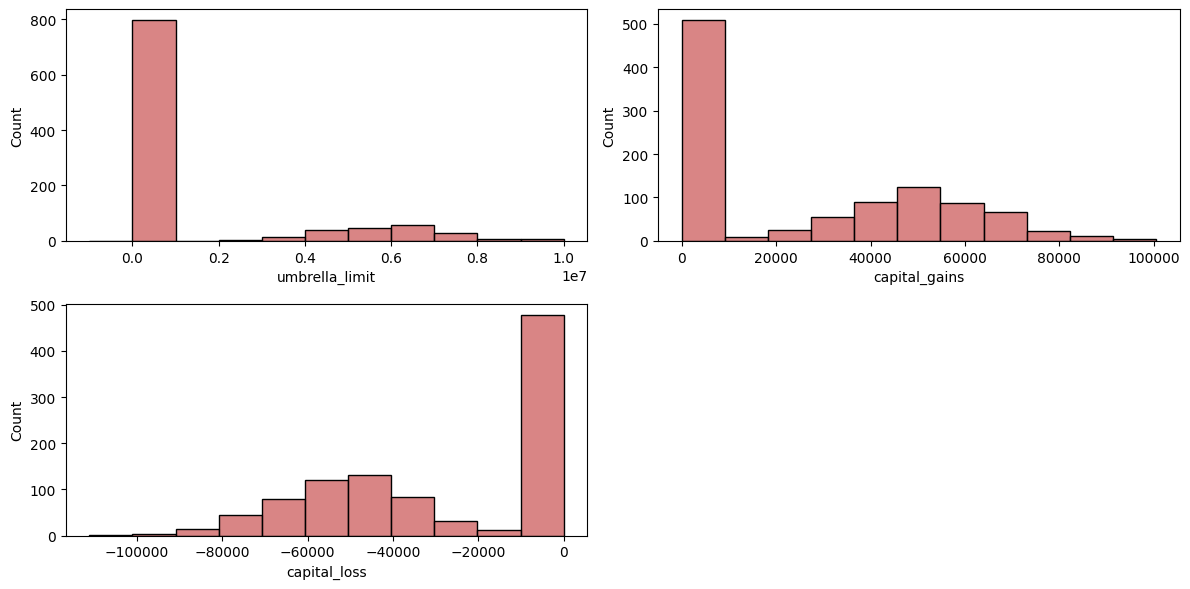

In [88]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(skewed_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=data[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* Apply a power transform featurewise to make data in the skewed_features more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [89]:
X = data.drop(columns=target_col)
y = data[target_col]

### Checking Skewness

In [90]:
# Check Skewness
X[skewed_features].skew(axis=0, skipna=True)

umbrella_limit    1.806712
capital_gains     0.478850
capital_loss     -0.391472
dtype: float64

In [91]:
from sklearn.preprocessing import PowerTransformer


# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the power transformation
X_copy = pt.fit_transform(data[skewed_features])

In [92]:
X_copy = pd.DataFrame(X_copy, columns=skewed_features)

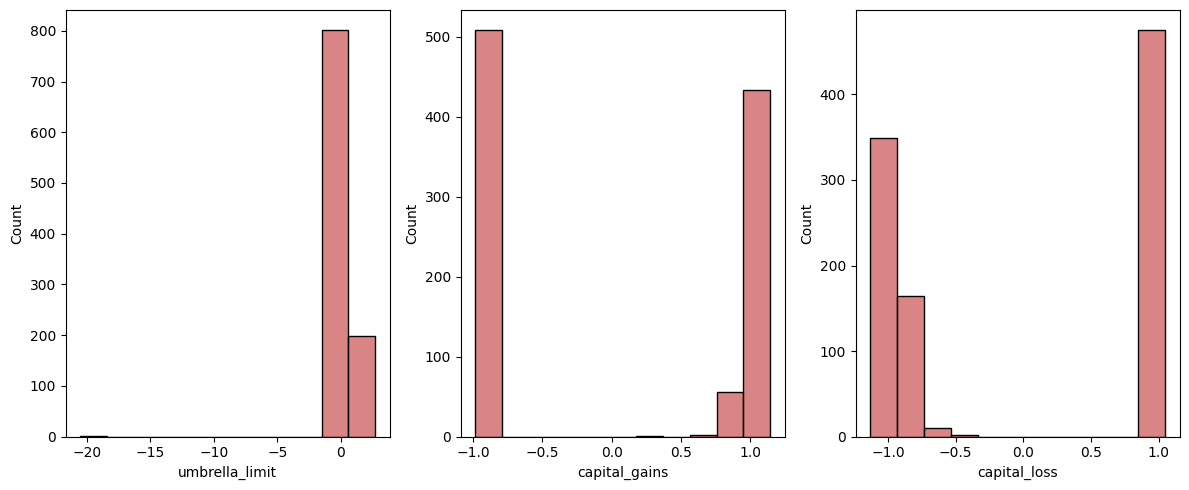

In [93]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(skewed_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [94]:
X_copy.skew(axis=0, skipna=True)

umbrella_limit   -7.865930
capital_gains     0.038722
capital_loss      0.090488
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [95]:
for feature in categorical_cols:
    print(feature,':', data[feature].nunique())

policy_state : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 4
incident_state : 7
incident_city : 7
property_damage : 3
police_report_available : 3
auto_make : 14
policy_deductable : 3
number_of_vehicles_involved : 4
bodily_injuries : 3
witnesses : 4
fraud_reported : 2
incident_period_of_day : 5


In [96]:
ordinal_features = ["insured_occupation", "insured_hobbies", "auto_make"]
categorical_features = [feature for feature in categorical_features if feature not in ordinal_features]
categorical_features

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'policy_deductable',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'incident_period_of_day']

### **Preprocessing using Column Transformer**

In [97]:
# Create Column Transformer with 3 types of transformers

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("Ordinal_Encoder", ordinal_encoder, ordinal_features),
        ("Transformer", transform_pipe, skewed_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [98]:
numerical_features

['months_as_customer',
 'age',
 'policy_annual_premium',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'vehicle_age']

In [99]:
categorical_features

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'policy_deductable',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'incident_period_of_day']

In [100]:
ordinal_features

['insured_occupation', 'insured_hobbies', 'auto_make']

In [101]:
skewed_features

['umbrella_limit', 'capital_gains', 'capital_loss']

In [102]:
features_all = categorical_features + numerical_features + ordinal_features + skewed_features

In [103]:
features_all

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'policy_deductable',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'incident_period_of_day',
 'months_as_customer',
 'age',
 'policy_annual_premium',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'vehicle_age',
 'insured_occupation',
 'insured_hobbies',
 'auto_make',
 'umbrella_limit',
 'capital_gains',
 'capital_loss']

In [104]:
drop_these = data_raw.columns.difference(features_all)

In [106]:
drop_these

Index(['auto_model', 'auto_year', 'capital-gains', 'capital-loss',
       'fraud_reported', 'incident_date', 'incident_hour_of_the_day',
       'incident_location', 'insured_zip', 'policy_bind_date', 'policy_csl',
       'policy_number'],
      dtype='object')

In [107]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 ['policy_state', 'insured_sex',
                                  'insured_education_level',
                                  'insured_relationship', 'incident_type',
                                  'collision_type', 'incident_severity',
                                  'authorities_contacted', 'incident_state',
                                  'incident_city', 'property_damage',
                                  'police_report_available',
                                  'policy_deductable',
                                  'number_of_vehicles_involved',
                                  'b...
                                ('Ordinal_Encoder', OrdinalEncoder(),
                                 ['insured_occupation', 'insured_hobbies',
                                  'auto_make']),
                                ('Transformer',
                                 Pipeline(steps=[('transformer',
                                                  PowerTransformer())]),
                                 ['umbrella_limit', 'capital_gains',
                                  'capital_loss']),
                                ('StandardScaler', StandardScaler(),
                                 ['months_as_customer', 'age',
                                  'policy_annual_premium', 'total_claim_amount',
                                  'injury_claim', 'property_claim',
                                  'vehicle_claim', 'vehicle_age'])])

In [108]:
X = preprocessor.fit_transform(X)

# Classification

In [109]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [110]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((711, 88), (178, 88))

In [111]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [112]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [113]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(random_state=42), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False, random_state=42),
     "Support Vector Classifier": SVC(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42)

}

In [114]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    results_train = []
    results_test = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        # Append evaluation train results
        results_train.append({
            'Classifier': list(models.keys())[i],
            'Accuracy': model_train_accuracy,
            'Precision': model_train_precision,
            'Recall': model_train_recall,
            'F1-Score': model_train_f1,
            'ROC AUC': model_train_rocauc_score,
        })
        
        # Append evaluation text results
        results_test.append({
            'Classifier': list(models.keys())[i],
            'Accuracy': model_test_accuracy,
            'Precision': model_test_precision,
            'Recall': model_test_recall,
            'F1-Score': model_test_f1,
            'ROC AUC': model_test_rocauc_score,
        })

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
        report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return results_train, results_test

In [115]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9775
- F1 score: 0.9859
- Precision: 0.9859
- Recall: 0.9859
- Roc Auc Score: 0.9652


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9438
- F1 score: 0.9640
- Precision: 0.9853
- Recall: 0.9437
- Roc Auc Score: 0.9441


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9888
- F1 score: 0.9929
- Precision: 1.0000
- Recall: 0.9859
- Roc Auc Score: 0.9930


Logistic Regression
Model performance for Training 

In [117]:
df_metric = pd.DataFrame(base_model_report[1])
df_metric.sort_values(by=['ROC AUC'], ascending=False)

Classifier  Accuracy  Precision    Recall  F1-Score  \
2          Gradient Boosting  0.988764   1.000000  0.985915  0.992908   
6     CatBoosting Classifier  0.988764   1.000000  0.985915  0.992908   
5              XGBClassifier  0.983146   1.000000  0.978873  0.989324   
0              Random Forest  0.977528   0.985915  0.985915  0.985915   
8        AdaBoost Classifier  0.960674   0.978723  0.971831  0.975265   
1              Decision Tree  0.943820   0.985294  0.943662  0.964029   
3        Logistic Regression  0.966292   0.972222  0.985915  0.979021   
4     K-Neighbors Classifier  0.943820   0.934211  1.000000  0.965986   
7  Support Vector Classifier  0.910112   0.903846  0.992958  0.946309   

    ROC AUC  
2  0.992958  
6  0.992958  
5  0.989437  
0  0.965180  
8  0.944249  
1  0.944053  
3  0.937402  
4  0.861111  
7  0.788146

**Here we can use to 5 classifer for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [118]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

catoost_params= {
        "iterations": [100, 200, 300],
        "learning_rate": [0.1, 0.05, 0.01],
        "depth": [3, 5, 7]
    }

dt_params= {'max_depth': [None, 10, 20]}

In [119]:
# Models list for Hyperparameter tuning using RandomizedSearchCV
randomcv_models = [
    ('XGBoost', XGBClassifier(random_state=42), xgboost_params),
    ("RF", RandomForestClassifier(random_state=42), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("Catboost", CatBoostClassifier(random_state=42,verbose=False), catoost_params),
    ("DT", DecisionTreeClassifier(random_state=42), dt_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [120]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=5,
                                   verbose=0, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': None, 'max_depth': 10}
---------------- Best Params for KNN -------------------
{'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'auto'}
---------------- Best Params for Catboost -------------------
{'learning_rate': 0.1, 'iterations': 300, 'depth': 7}
---------------- Best Params for DT -------------------
{'max_depth': None}


In [121]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 3},
 'RF': {'n_estimators': 200, 'max_features': None, 'max_depth': 10},
 'KNN': {'weights': 'uniform', 'n_neighbors': 4, 'algorithm': 'auto'},
 'Catboost': {'learning_rate': 0.1, 'iterations': 300, 'depth': 7},
 'DT': {'max_depth': None}}

## Retraining the Model with best Parameters

In [122]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "CatBoostClassifier": CatBoostClassifier(**model_param['Catboost'], verbose=False),
    "DecisionTreeClassifier": DecisionTreeClassifier(**model_param['DT']),
}
tuned_report_train, tuned_report_test =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9607
- F1 score: 0.9749
- Precision: 0.9927
- Recall: 0.9577
- Roc Auc Score: 0.9650


KNeighborsClassifier
Model performance for Training set
- Accuracy: 0.9831
- F1 score: 0.9892
- Precision: 0.9787
- Recall: 1.0000
- Roc Auc Score: 0.9623
----------------------------------
Model performance for Test set
- Accuracy: 0.9607
- F1 score: 0.9759
- Precision: 0.9530
- Recall: 1.0000
- Roc Auc Score: 0.9028


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9719
- F1 score: 0.9822
- Precision: 0.9928
- Recall: 0.9718
- Roc Auc Score: 0.9720


CatBoostClassifier
Model performance 

In [123]:
tuned_report_test_df = pd.DataFrame(tuned_report_test)
tuned_report_test_df.sort_values(by='F1-Score', ascending=False)

Classifier  Accuracy  Precision    Recall  F1-Score   ROC AUC
3        CatBoostClassifier  0.988764   1.000000  0.985915  0.992908  0.992958
2             XGBClassifier  0.971910   0.992806  0.971831  0.982206  0.972027
1      KNeighborsClassifier  0.960674   0.953020  1.000000  0.975945  0.902778
0  Random Forest Classifier  0.960674   0.992701  0.957746  0.974910  0.964984
4    DecisionTreeClassifier  0.949438   0.985401  0.950704  0.967742  0.947574

In [124]:
tuned_report_test_df['Classifier'].to_list()

['Random Forest Classifier',
 'KNeighborsClassifier',
 'XGBClassifier',
 'CatBoostClassifier',
 'DecisionTreeClassifier']

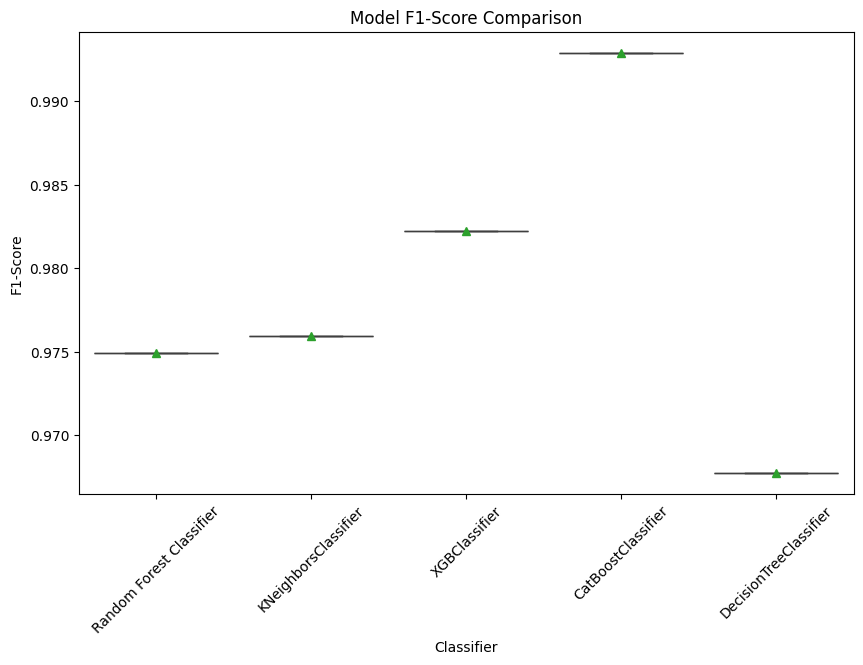

In [125]:
metric_for_comparison = 'F1-Score'
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='Classifier', y=metric_for_comparison, data=tuned_report_test_df, showmeans=True)

# Set plot title and labels
plt.title(f'Model {metric_for_comparison} Comparison')
plt.ylabel(metric_for_comparison)
plt.xlabel('Classifier')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [126]:
best_model = XGBClassifier(**model_param['XGBoost'],n_jobs=-1)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9719
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.99      0.97      0.98       142

    accuracy                           0.97       178
   macro avg       0.95      0.97      0.96       178
weighted avg       0.97      0.97      0.97       178



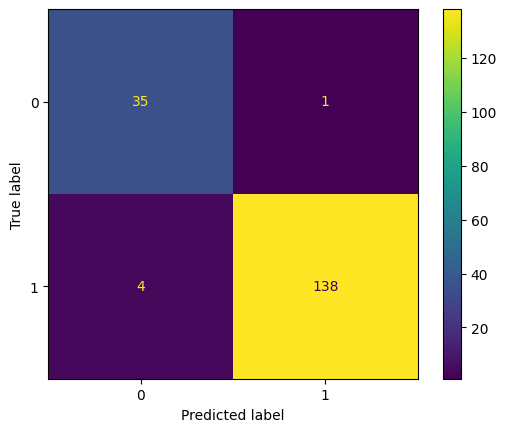

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is XGBClassifier with Accuracy 96%

In [128]:
def display_feature_importance(models, X, y, feature_names, n_top=10):
    """
    This function takes in a dictionary of models, the dataset X, y, and the feature names.
    It fits each model, extracts feature importances (if available), 
    and plots the top n features.

    Parameters:
    models (dict): A dictionary containing model names and their respective model objects.
    X (np.ndarray): Feature dataset.
    y (pd.Series): Target variable.
    feature_names (list): List of feature names after transformations.
    n_top (int): Number of top features to display. Default is 10.
    
    Returns:
    None
    """
    
    for model_name, model in models.items():
        # Fit the model
        model.fit(X, y)
        print(f"Feature ranking for model: {model_name}")
        try:
            # Check if the model has the attribute `feature_importances_`
            if hasattr(model, 'feature_importances_'):
                # Get feature importances
                importance_scores = model.feature_importances_
                
            else:                 
                print(f"{model_name} does not support feature importances.")
                importance_scores = model.coef_[0]
                
            # Create a DataFrame from feature names and importances
            data = {'Feature': feature_names, 'Score': importance_scores}
            df = pd.DataFrame(data)
            
            
            # Take the absolute value of the score
            df['Abs_Score'] = np.abs(df['Score'])
            
            df_sorted = df.sort_values(by="Abs_Score", ascending=False)
            if n_top:
                # Sort by absolute value of score in descending order (top 10)
                df_sorted = df_sorted.head(n_top)
            
            # Define a color palette based on score values (positive = green, negative = red)
            colors = ["green" if score > 0 else "red" for score in df_sorted["Score"]]
            
            # Create the bar chart with Seaborn
            sns.barplot(x="Feature", y="Score", hue="Feature", legend=False, data=df_sorted, palette=colors)
            
            # Customize the plot for better visual appeal
            plt.xlabel("Feature")
            plt.ylabel("Feature Importance Score")
            plt.title(f"Feature Importance in {model_name} Classification")
            plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
            plt.tight_layout()  # Adjust spacing between elements
        
            # Display the plot
            plt.show()
                 
            
            
        except Exception as e:
            print(f"Error occurred while extracting feature importances: {str(e)}")



In [129]:
# Prepare the preprocessed data
X_transformed = X_res.copy()  # X is the original feature set
feature_names = (preprocessor.transformers_[0][1].get_feature_names_out(categorical_features).tolist() +
                 preprocessor.transformers_[1][1].get_feature_names_out(ordinal_features).tolist() +
                 skewed_features + 
                 numerical_features)  # Get feature names after transformation

Feature ranking for model: Random Forest


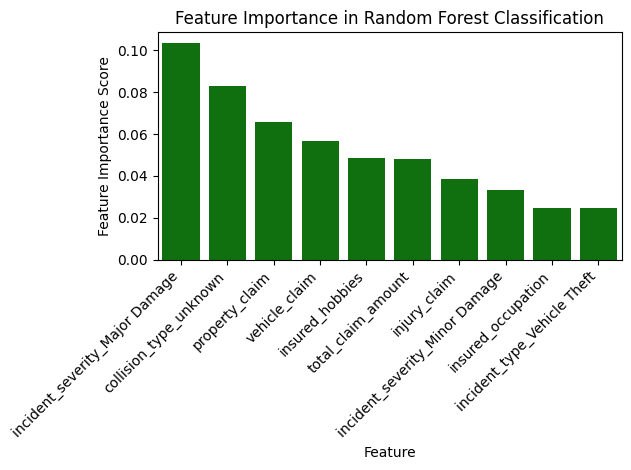

Feature ranking for model: Decision Tree


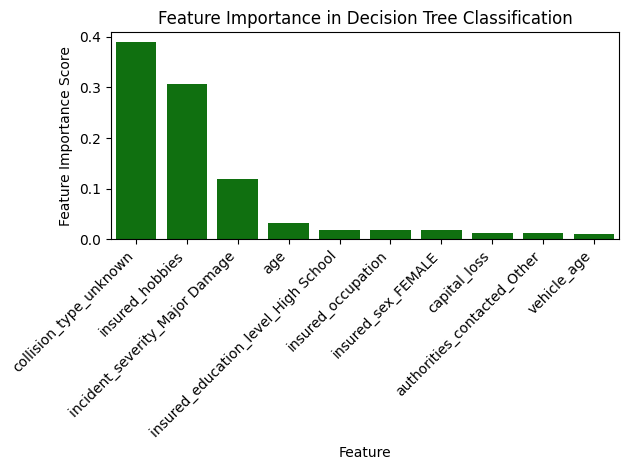

Feature ranking for model: Gradient Boosting


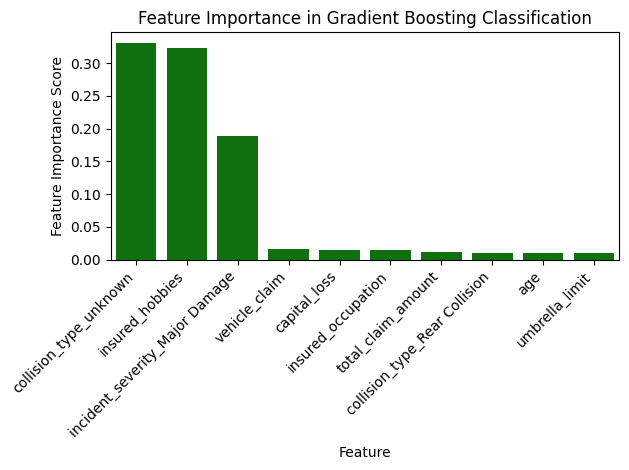

Feature ranking for model: Logistic Regression
Logistic Regression does not support feature importances.


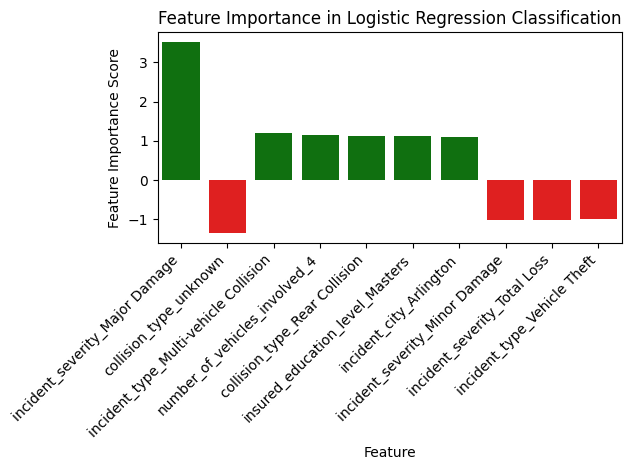

Feature ranking for model: K-Neighbors Classifier
K-Neighbors Classifier does not support feature importances.
Error occurred while extracting feature importances: 'KNeighborsClassifier' object has no attribute 'coef_'
Feature ranking for model: XGBClassifier


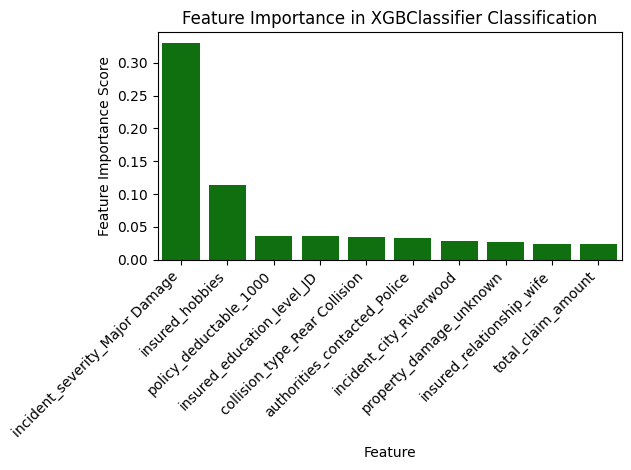

Feature ranking for model: CatBoosting Classifier


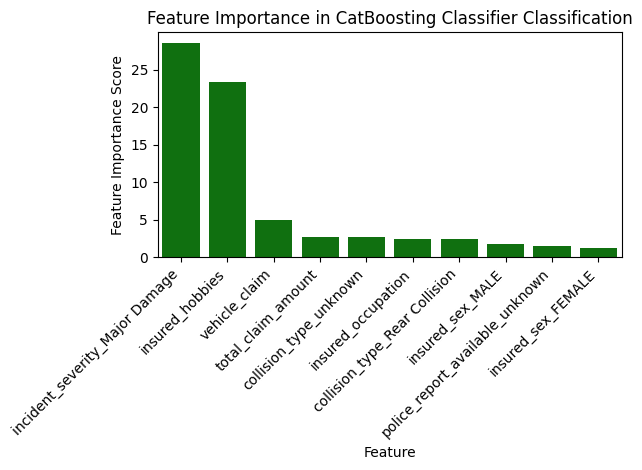

Feature ranking for model: Support Vector Classifier
Support Vector Classifier does not support feature importances.
Error occurred while extracting feature importances: coef_ is only available when using a linear kernel
Feature ranking for model: AdaBoost Classifier


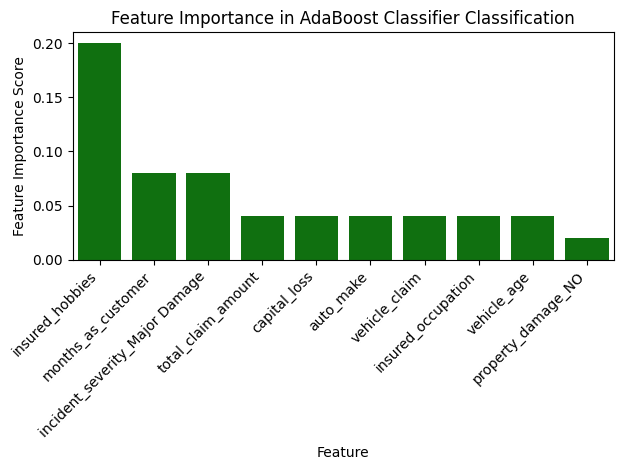

In [130]:
# Call the display feature importance function after model evaluation
display_feature_importance(models, X_res, y_res, feature_names, n_top=10)  # Specify how many top features to display


In [64]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [23]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [ ]:
df.isna().sum()

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])

df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [ ]:
df.head(3)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
corrs = df.corr()['fraud_reported']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

In [ ]:
df.columns

In [31]:
feat=['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit',\
'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state',
'insured_relationship', 'months_as_customer']

In [32]:
X = df[feat]
y = df.fraud_reported

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
!pip install imblearn

In [36]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [ ]:
y_train.value_counts()

In [ ]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

In [ ]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('DT', DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF', RandomForestClassifier(n_estimators=500)))
    level0.append(('KNN', KNeighborsClassifier(5)))
    level0.append(('XGB', XGBClassifier(objective= 'binary:logistic', use_label_encoder=False)))
    level1 = LogisticRegression() 
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier(max_depth=10)
    models['RF'] = RandomForestClassifier(n_estimators=500)
    models['KNN'] = KNeighborsClassifier(5)
    #models['ADA'] = AdaBoostClassifier(n_estimators=500)
    models['XGB'] = XGBClassifier(objective= 'binary:logistic', eval_metric='logloss',use_label_encoder=False)
    models['Stacking'] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.2f (%.2f)' % (name, mean(scores), std(scores)))

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [42]:
import pickle
# Save trained model to file
pickle.dump(model, open("insurance_ml3.pkl", "wb"))